# Detecting Human Activities Through Smartphone Sensor - EDA

- Data set source:  WISDM Lab of Frodham University, NY
https://archive.ics.uci.edu/dataset/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset

Data captured using

- Two kinds of devices:
    - Smartphone (Samsung Galaxy S5)
    - Smartwatch (LG G)

    
- Two kinds of embedded kinematic sensors (for each device):
    - Accelerometer - for measurement of linear acceleration (m/sec^2)
    - Gyroscope - for measurement of angular velocity (rad/sec)



Reference coordinate system definition:
---

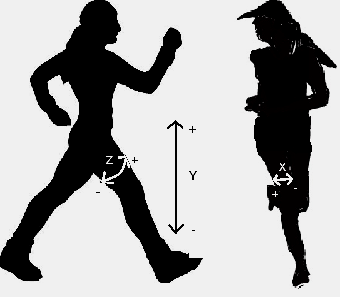


In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
from tqdm import tqdm
import filecmp

PBAR_FORMAT='{desc:12}{percentage:3.0f}%|{bar:27}[ {n:4d}/{total:4d}, {elapsed}<{remaining}{postfix} ]'

Each activity is represented as an alphabet in the dataset. To make meaningful inference of data we map it to actual activity

In [28]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

# Exploratory Data Analysis of raw data (time series sensors data)

## Phone Accelerometer

- Load the phone accelerometer sensor data for participant 1

In [29]:
df_pa_p01 = pd.read_csv(r'../dataset/raw/phone/accel/data_1601_accel_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
df_pa_p01.z = df_pa_p01.z.str.strip(';')
df_pa_p01.z = pd.to_numeric(df_pa_p01.z)
df_pa_p01['activity'] = df_pa_p01['activity_code'].map(activity_codes_mapping)
df_pa_p01 = df_pa_p01[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

df_pa_p01

participant_id activity_code         activity        timestamp  \
0                1601             A          walking  265073308304101   
1                1601             A          walking  265073348330612   
2                1601             A          walking  265073388368581   
3                1601             A          walking  265073428111445   
4                1601             A          walking  265073468081082   
...               ...           ...              ...              ...   
81452            1601             S  folding clothes  258908699056416   
81453            1601             S  folding clothes  258908738947822   
81454            1601             S  folding clothes  258908778855321   
81455            1601             S  folding clothes  258908818435165   
81456            1601             S  folding clothes  258908858366259   

               x          y         z  
0       4.703409   9.127296  0.064045  
1       5.354632  15.635334 -0.629077  
2       6.399701  12.926893  0.450110  
3      10.532093  13.207614 -1.024718  
4      16.129736   2.683301  1.142633  
...          ...        ...       ...  
81452   2.015319   9.988011  0.746392  
81453   1.681927  10.074801  1.726219  
81454   1.148020   9.127296  1.492186  
81455   1.417966   9.126099  1.077989  
81456   1.383250  10.053851  2.373252  

[81457 rows x 7 columns]

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

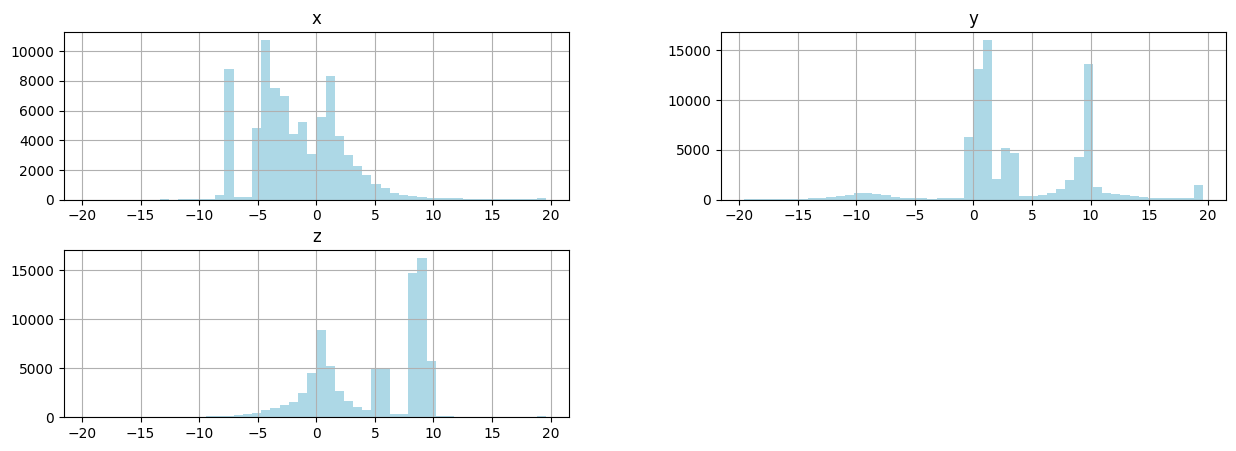

In [30]:
df_pa_p01[['x', 'y', 'z']].hist(bins = 50, figsize = (15, 5), color='lightblue')

    - Observation
        - data shows bimodal in nature, probably due to standing and sitting posture separation

- Lets visualize time series data

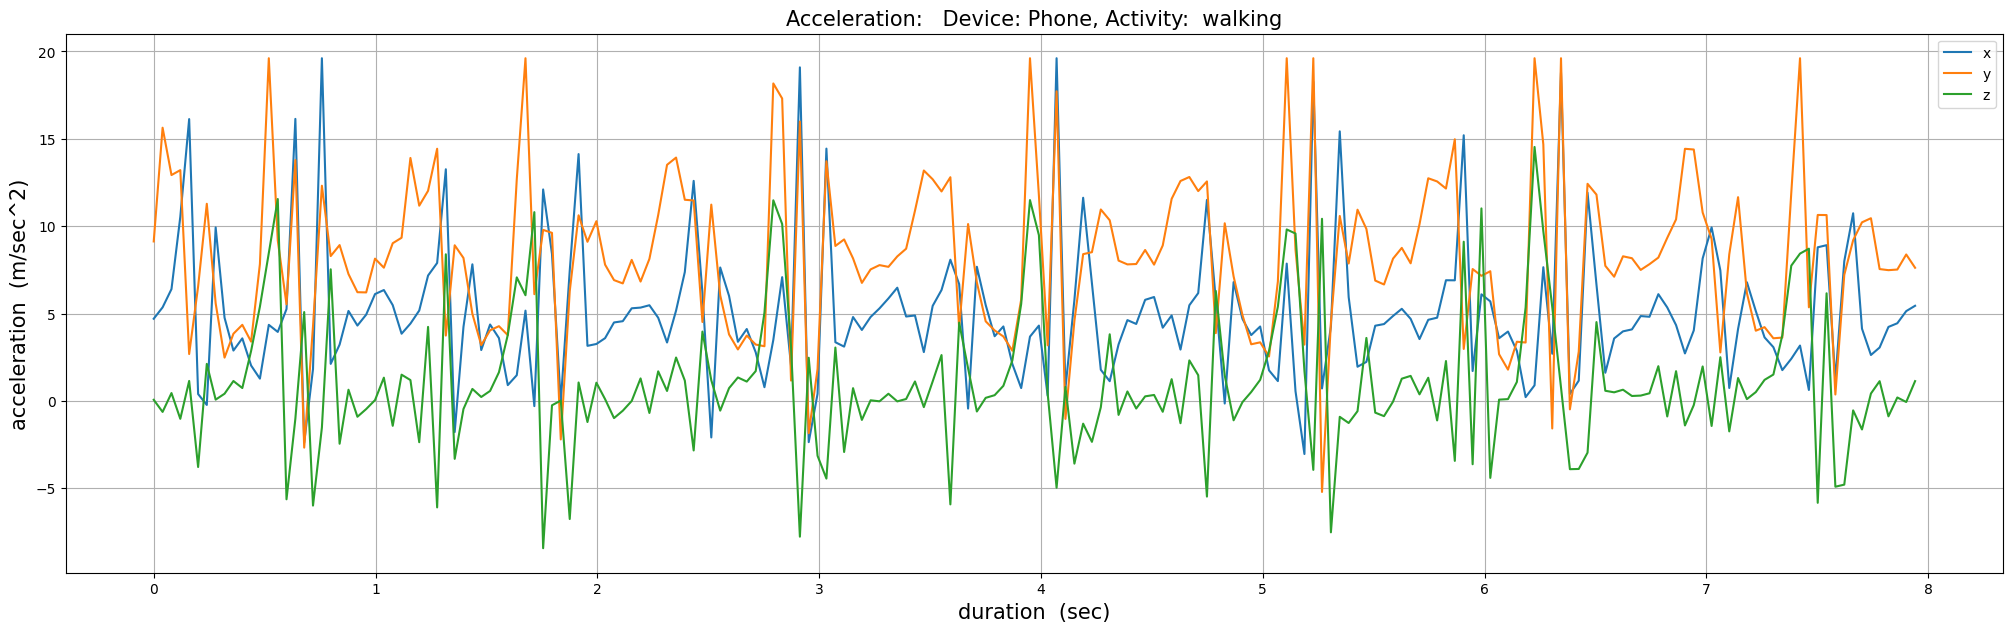

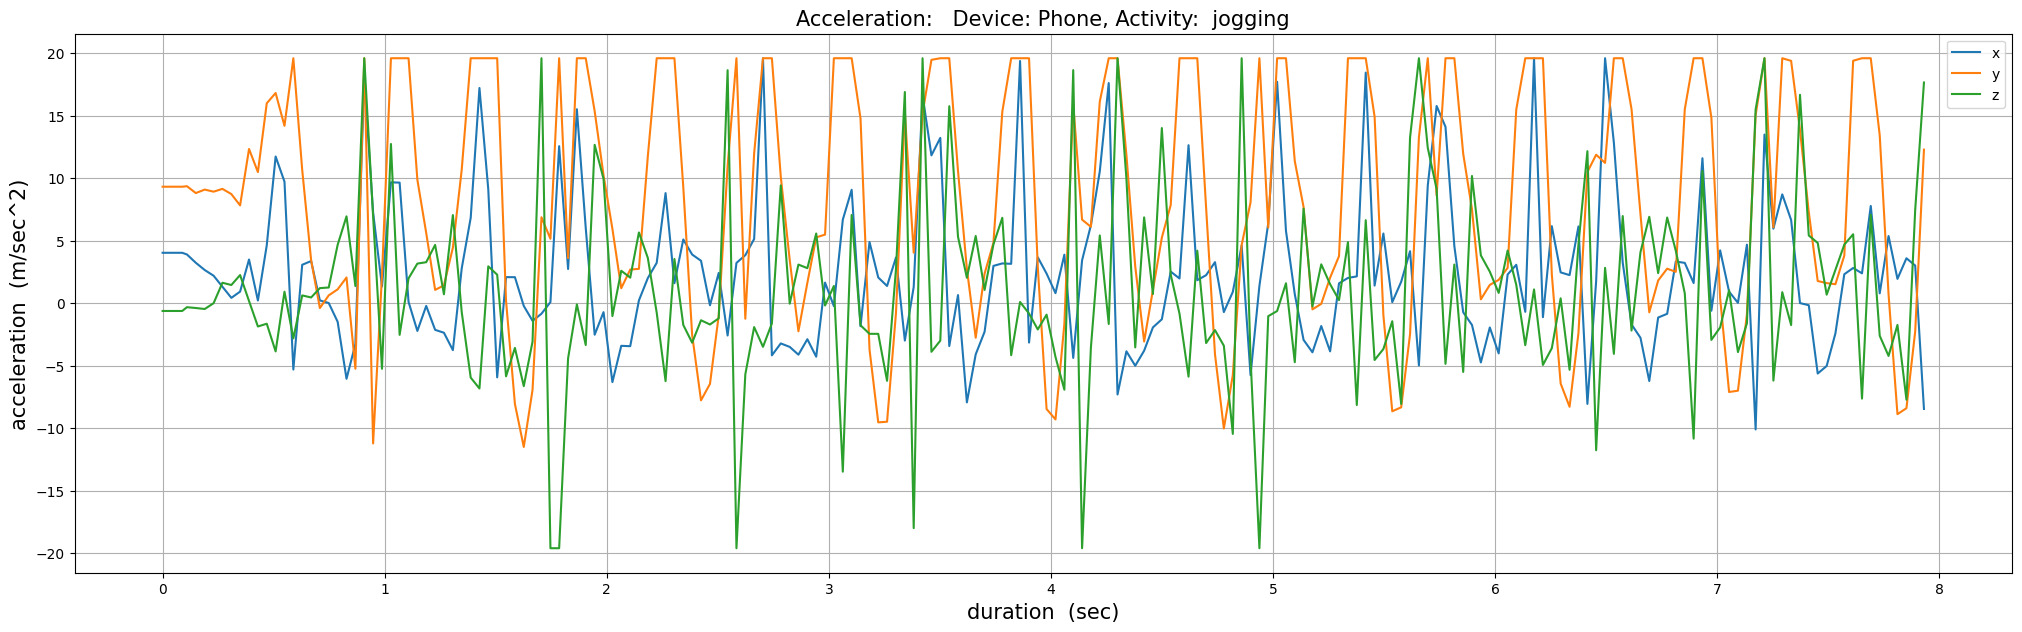

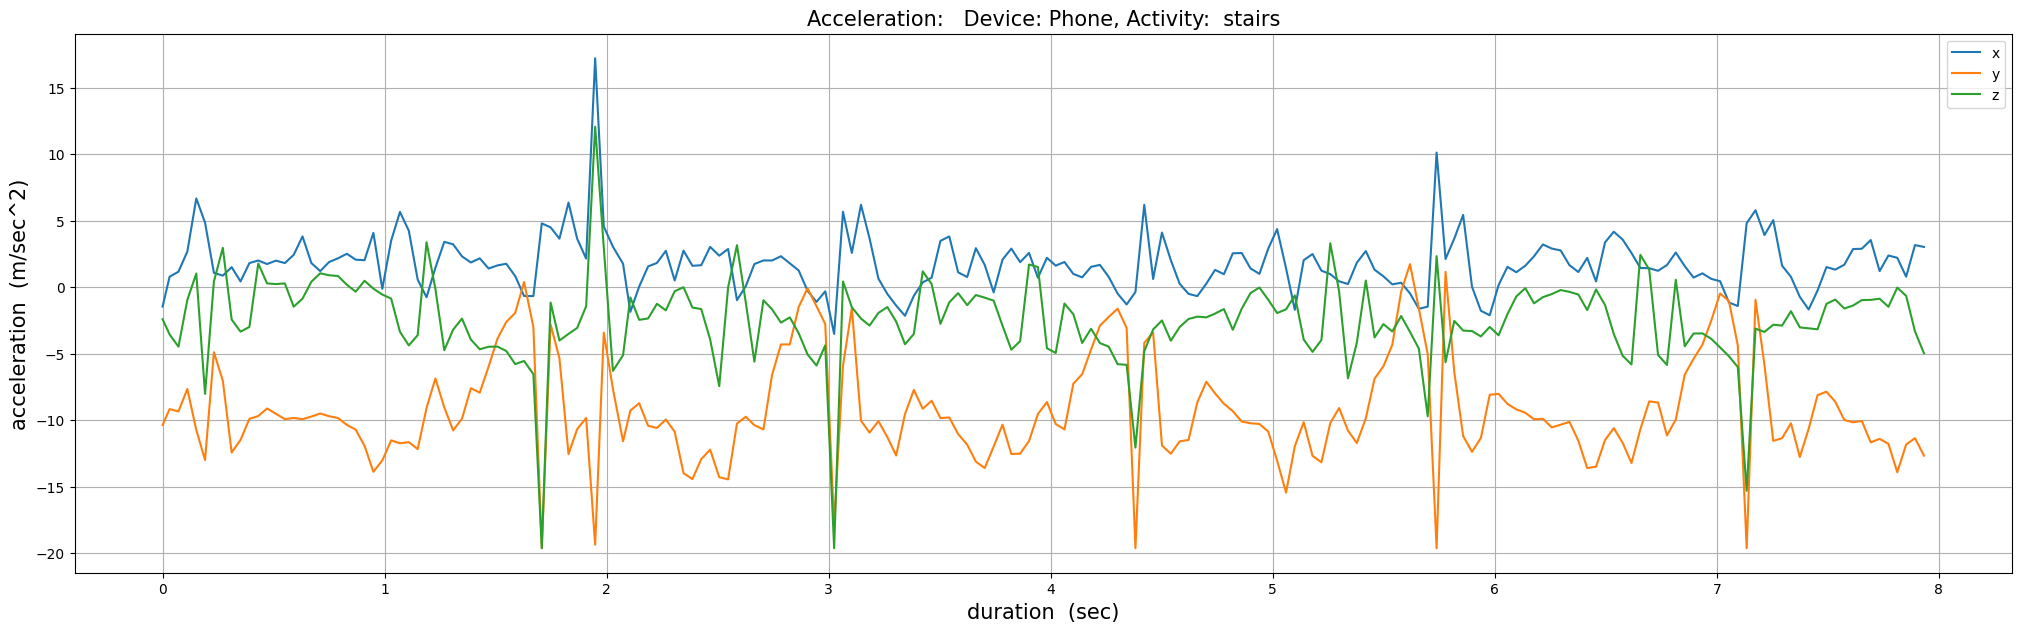

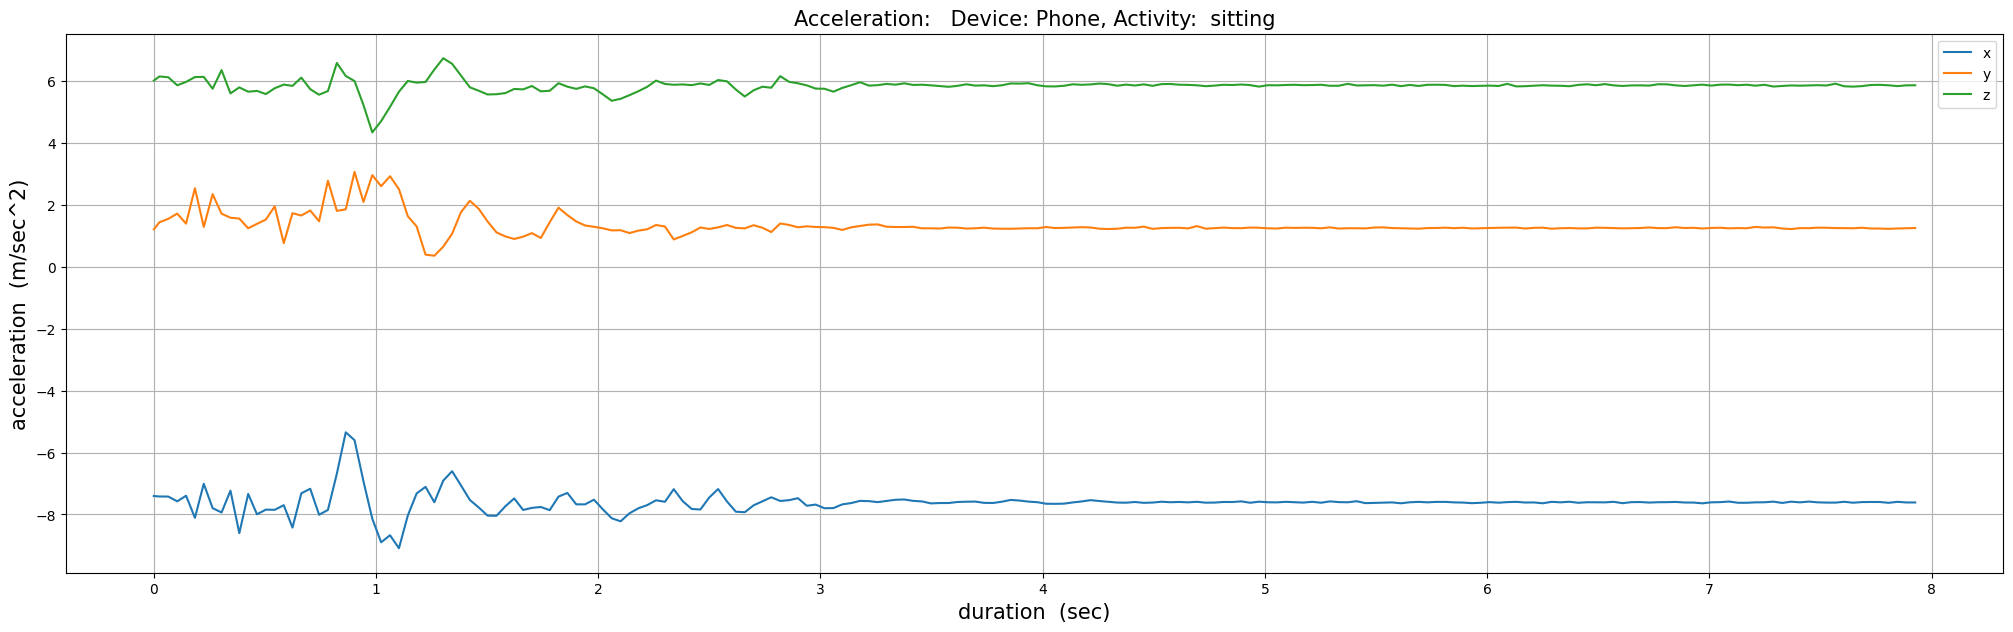

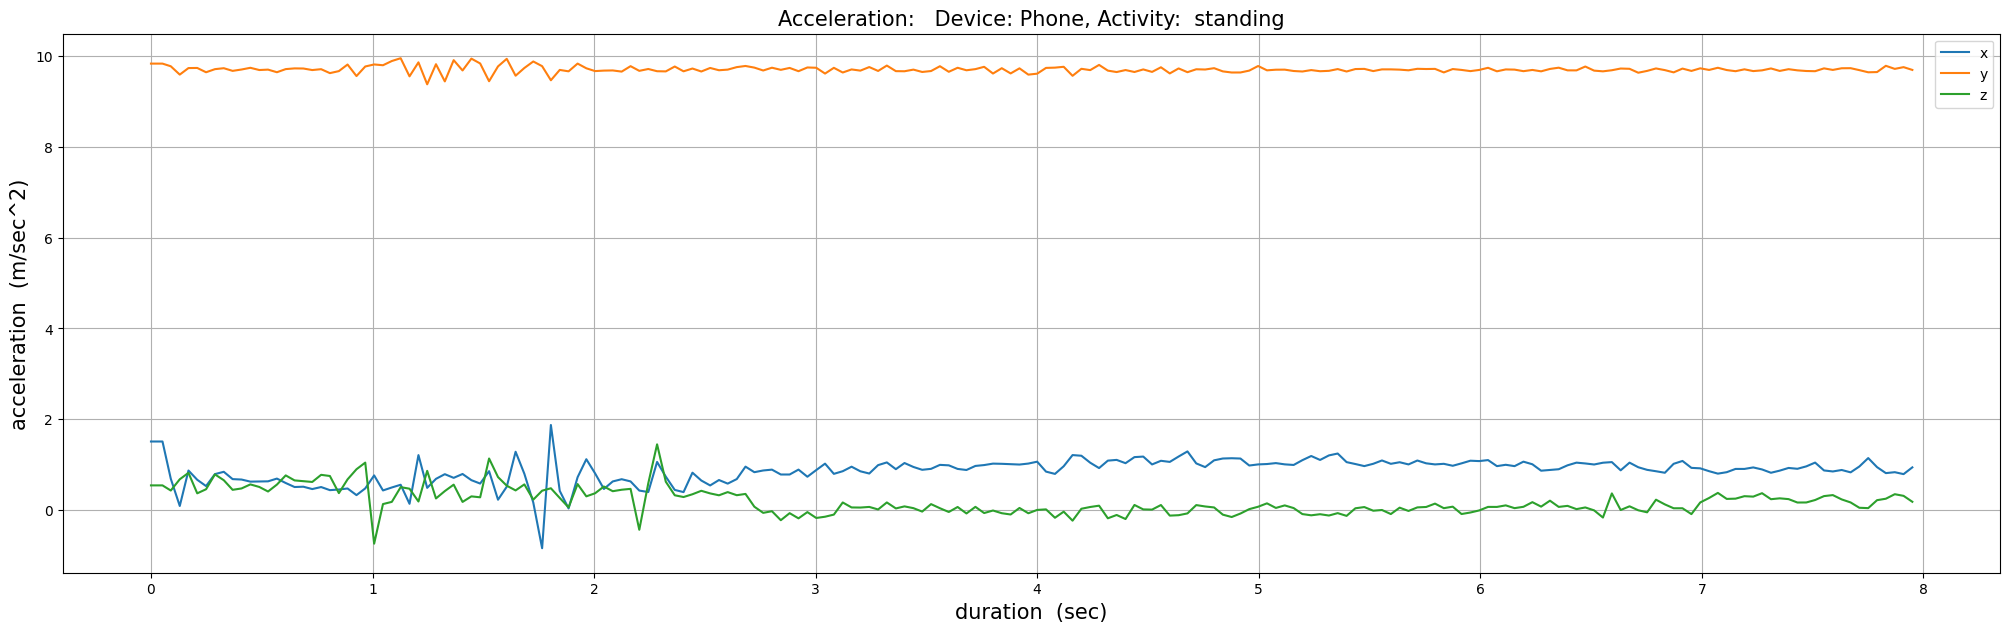

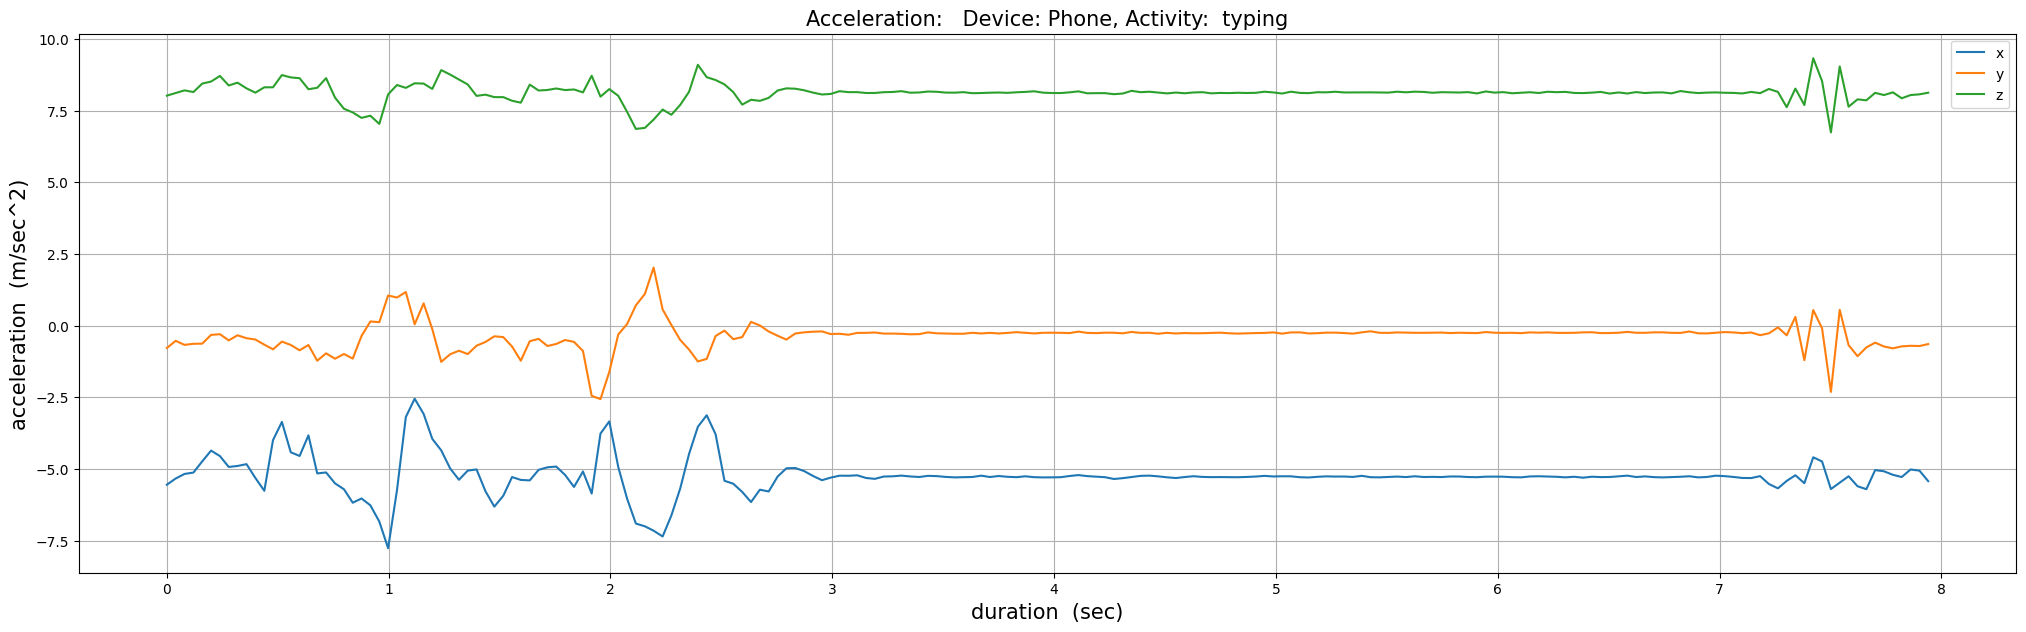

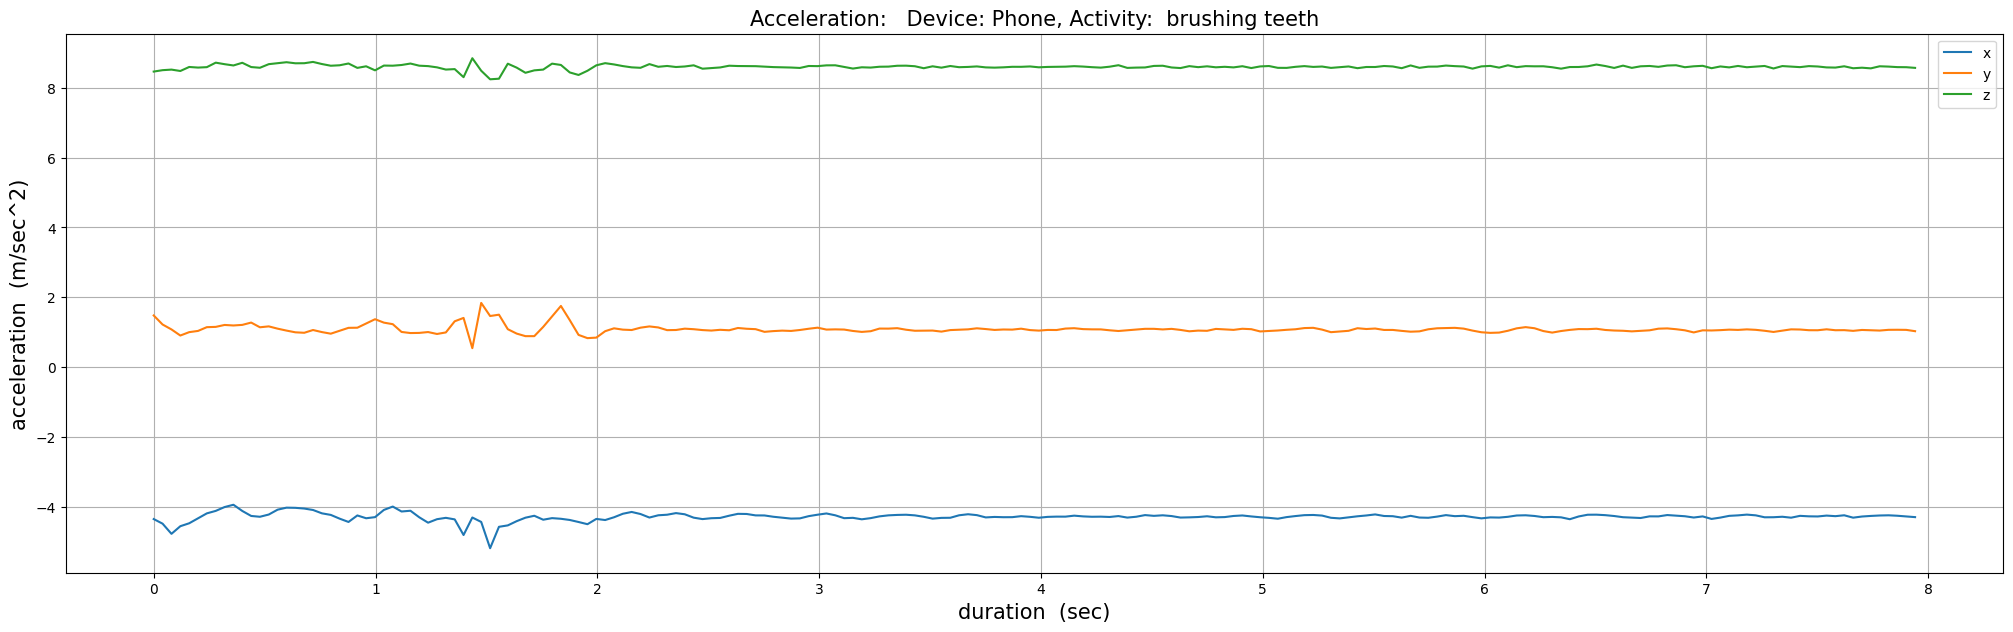

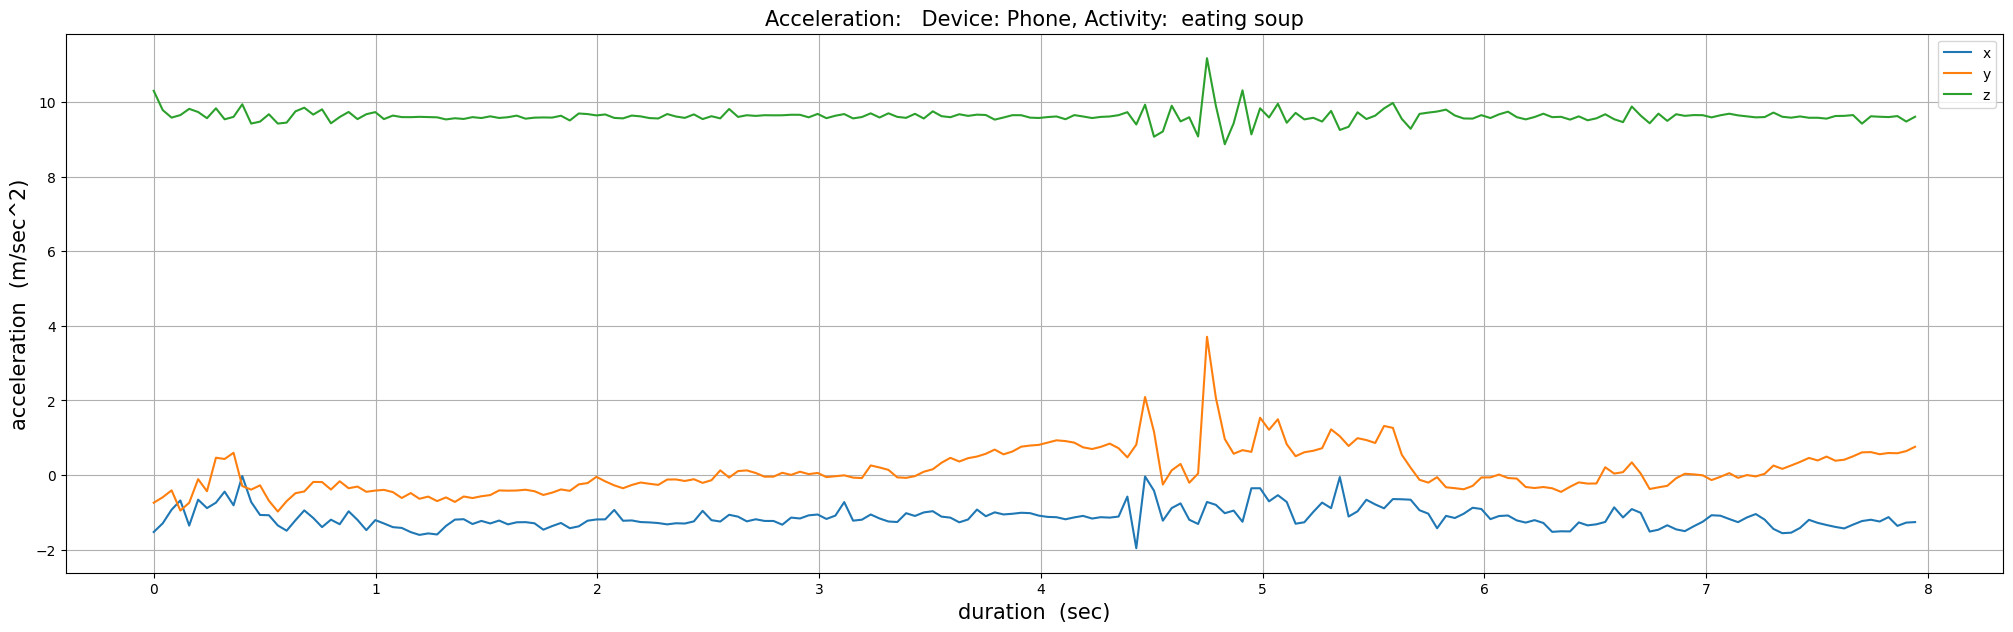

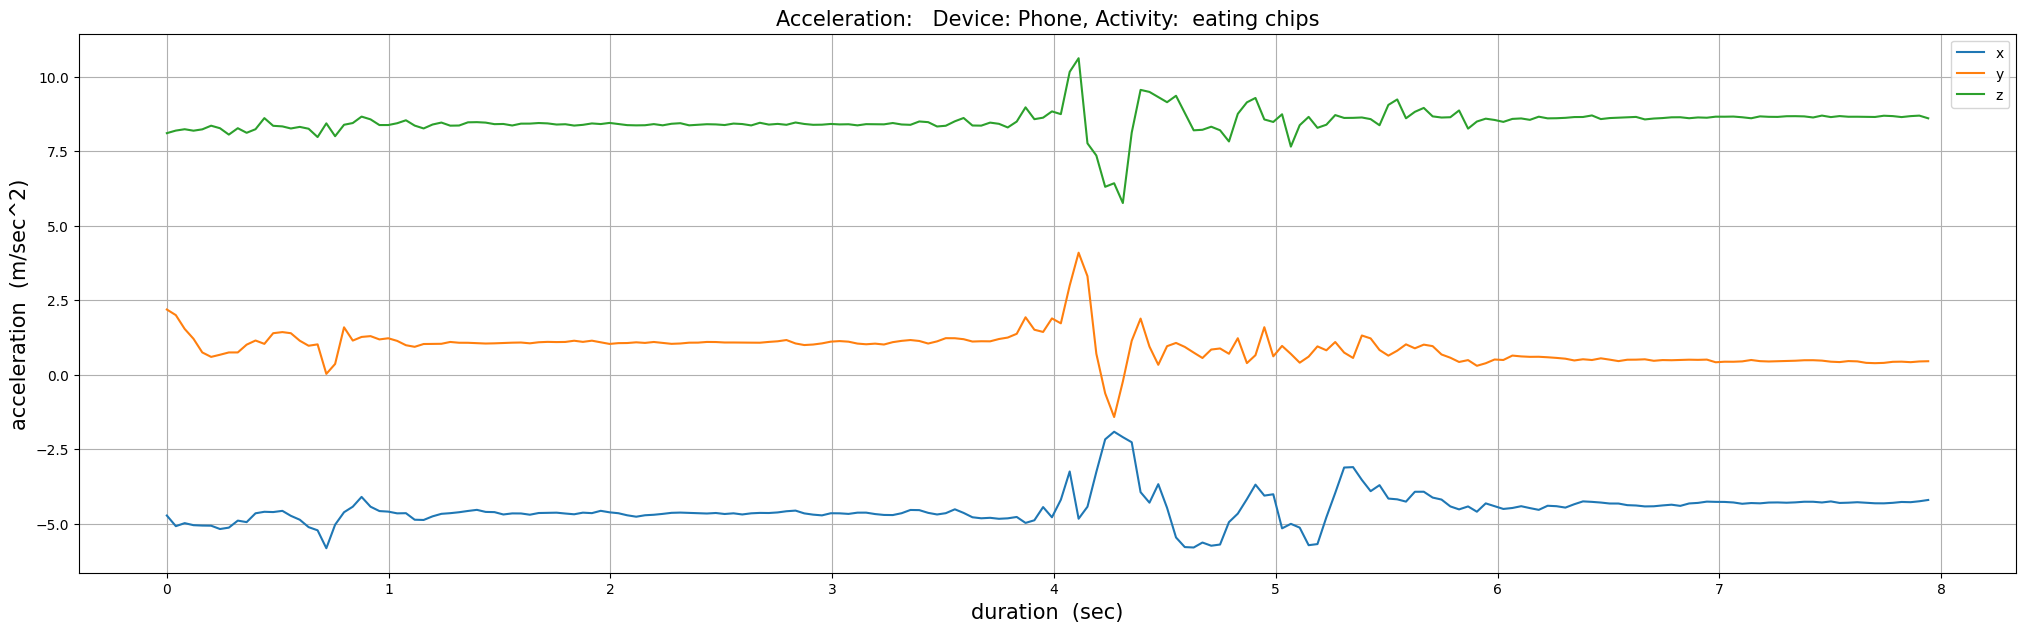

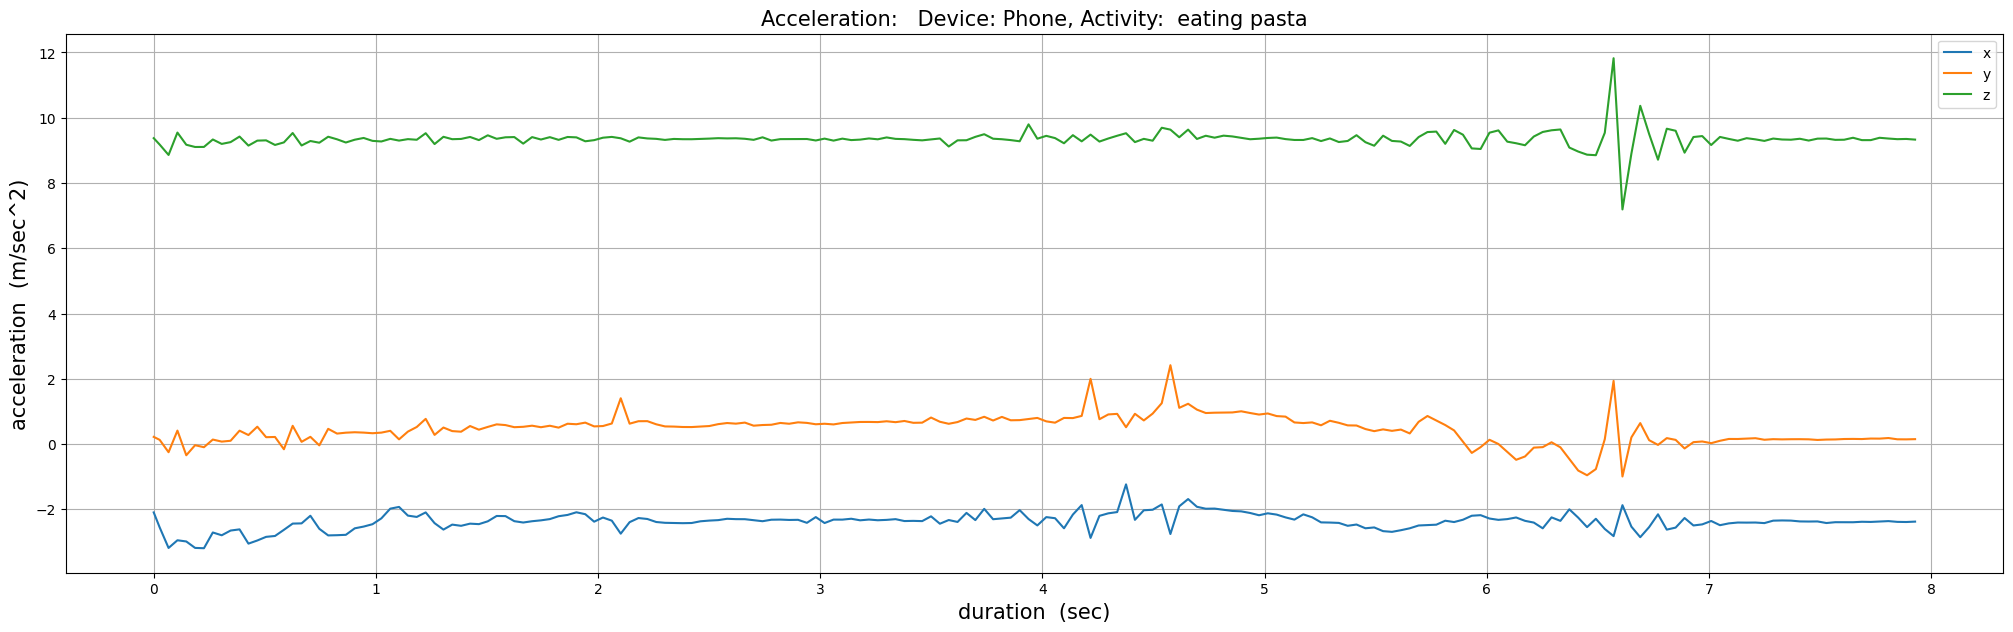

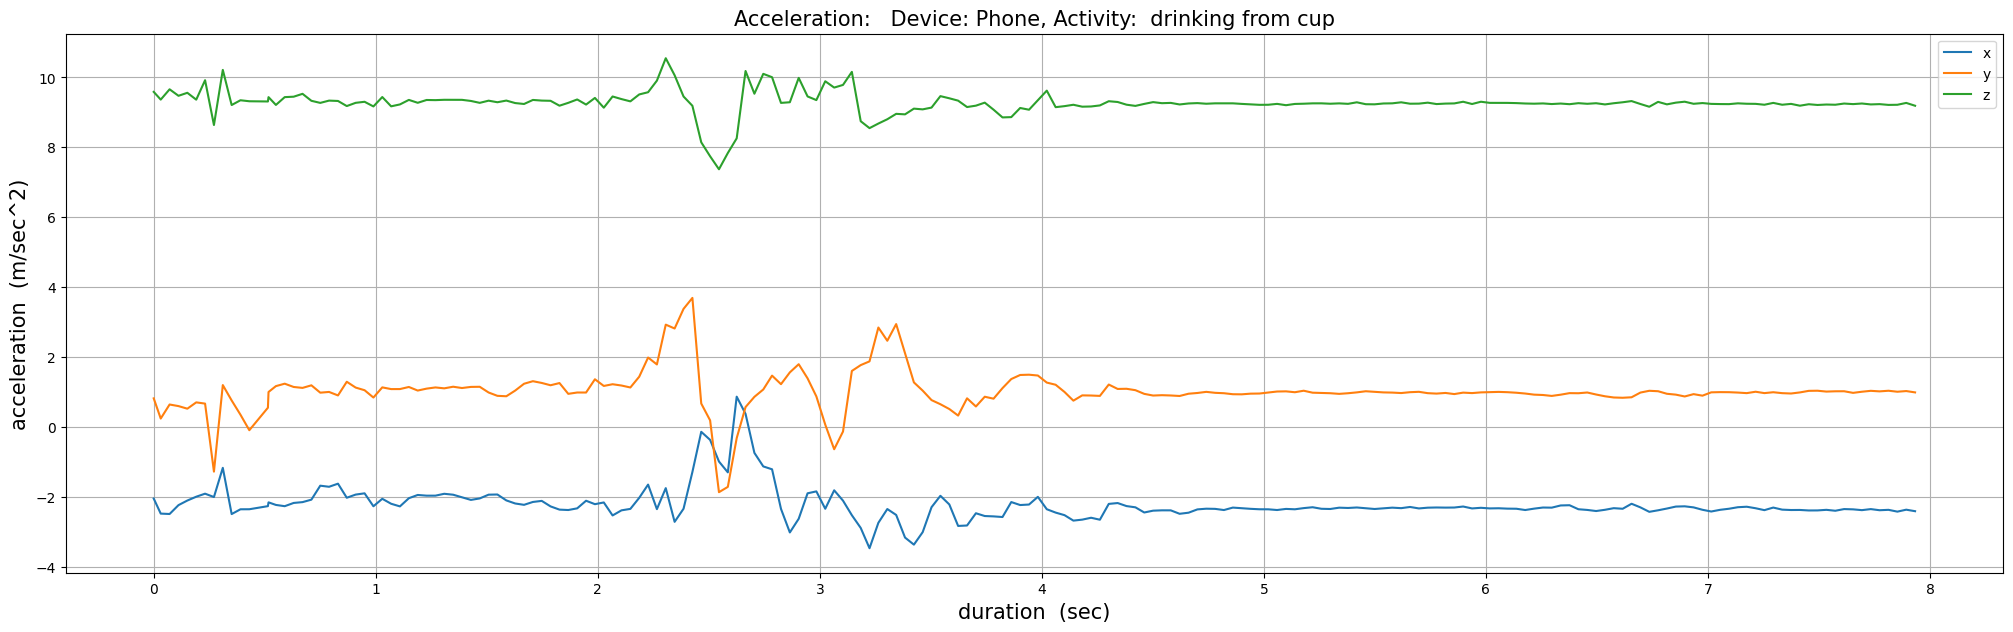

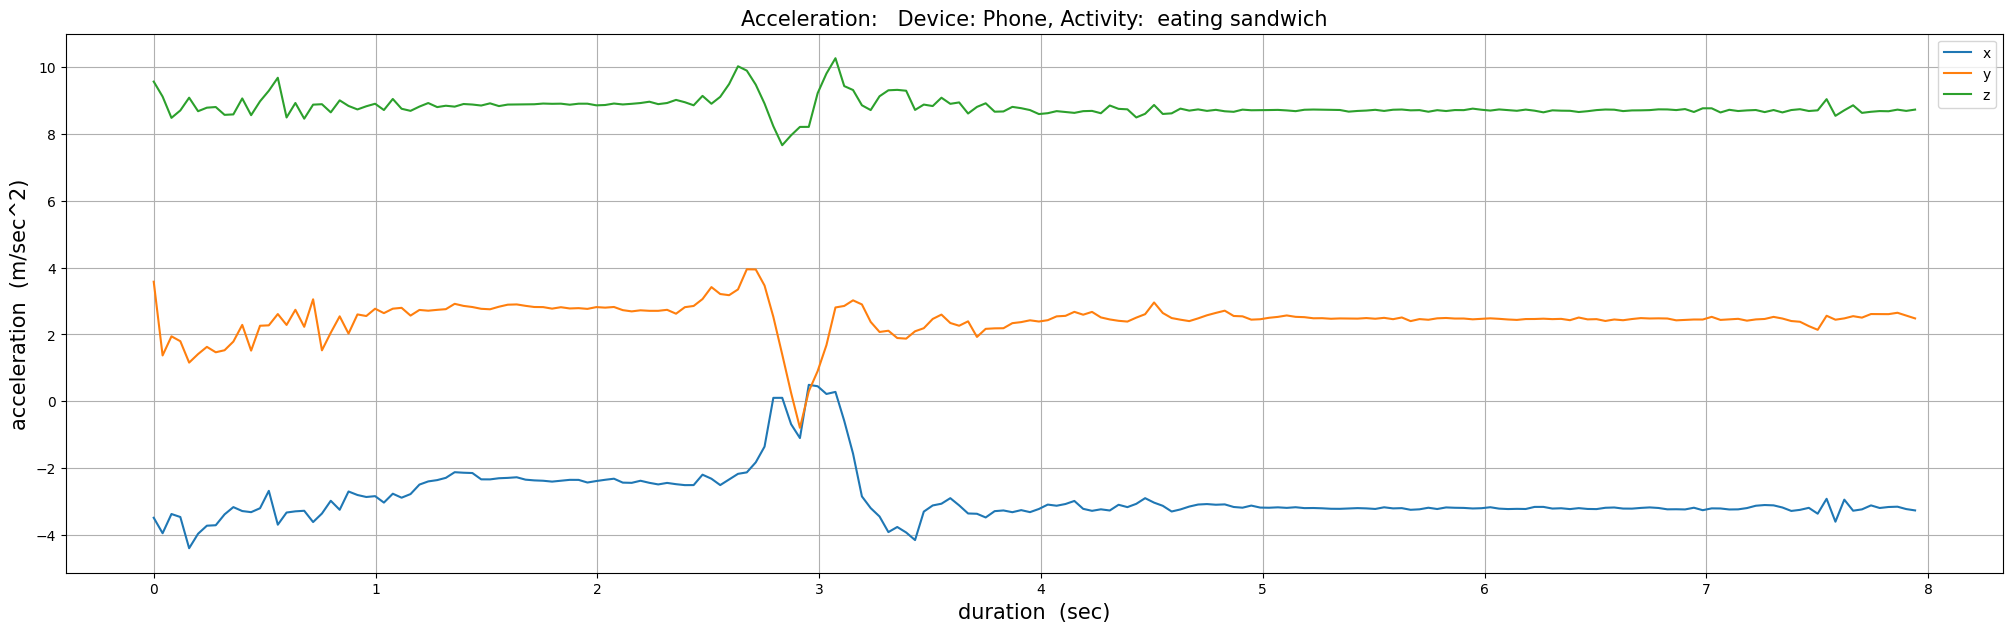

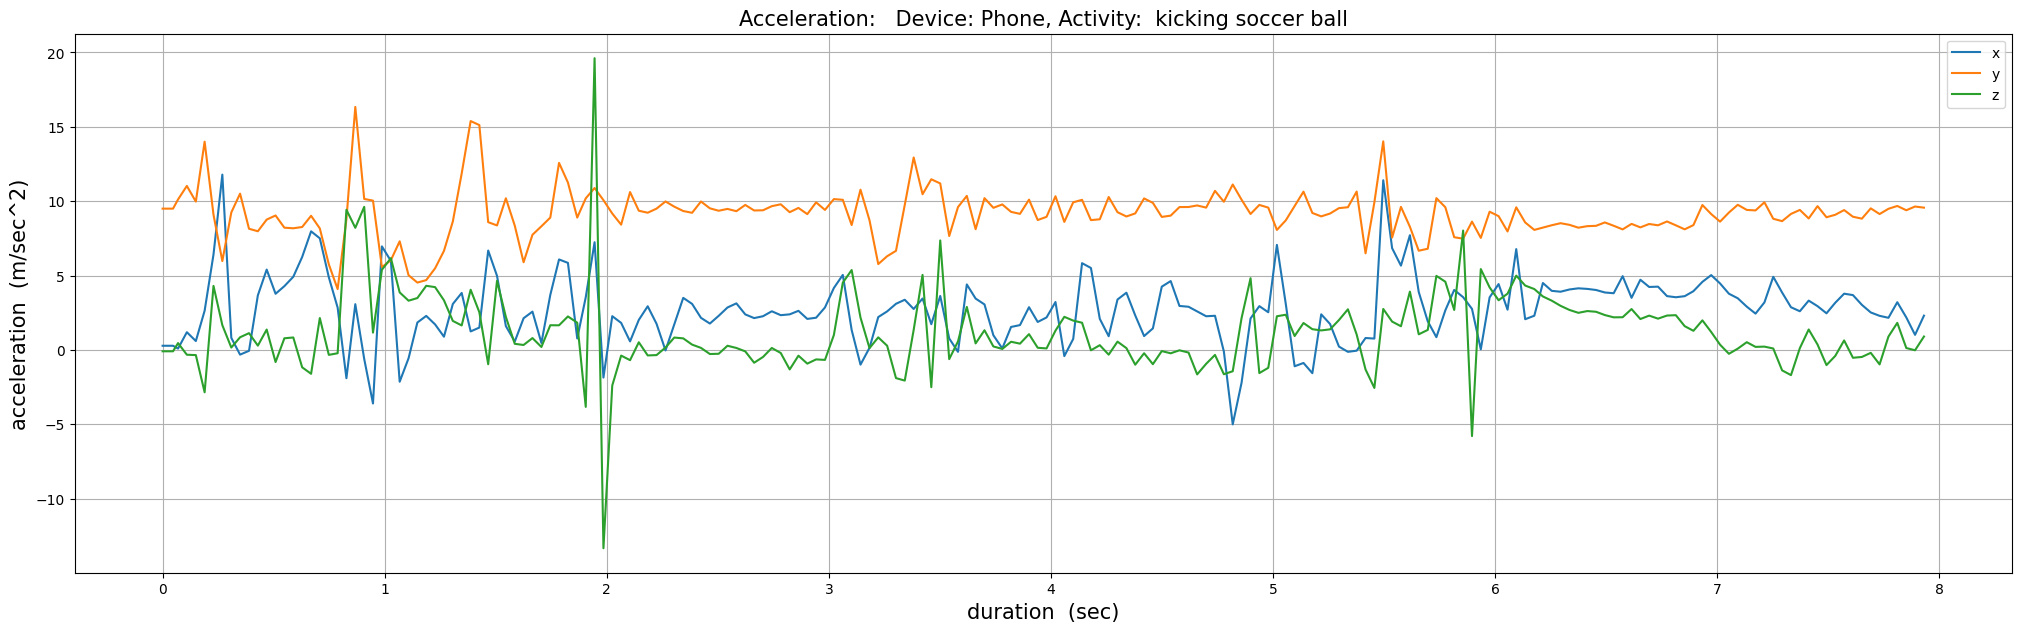

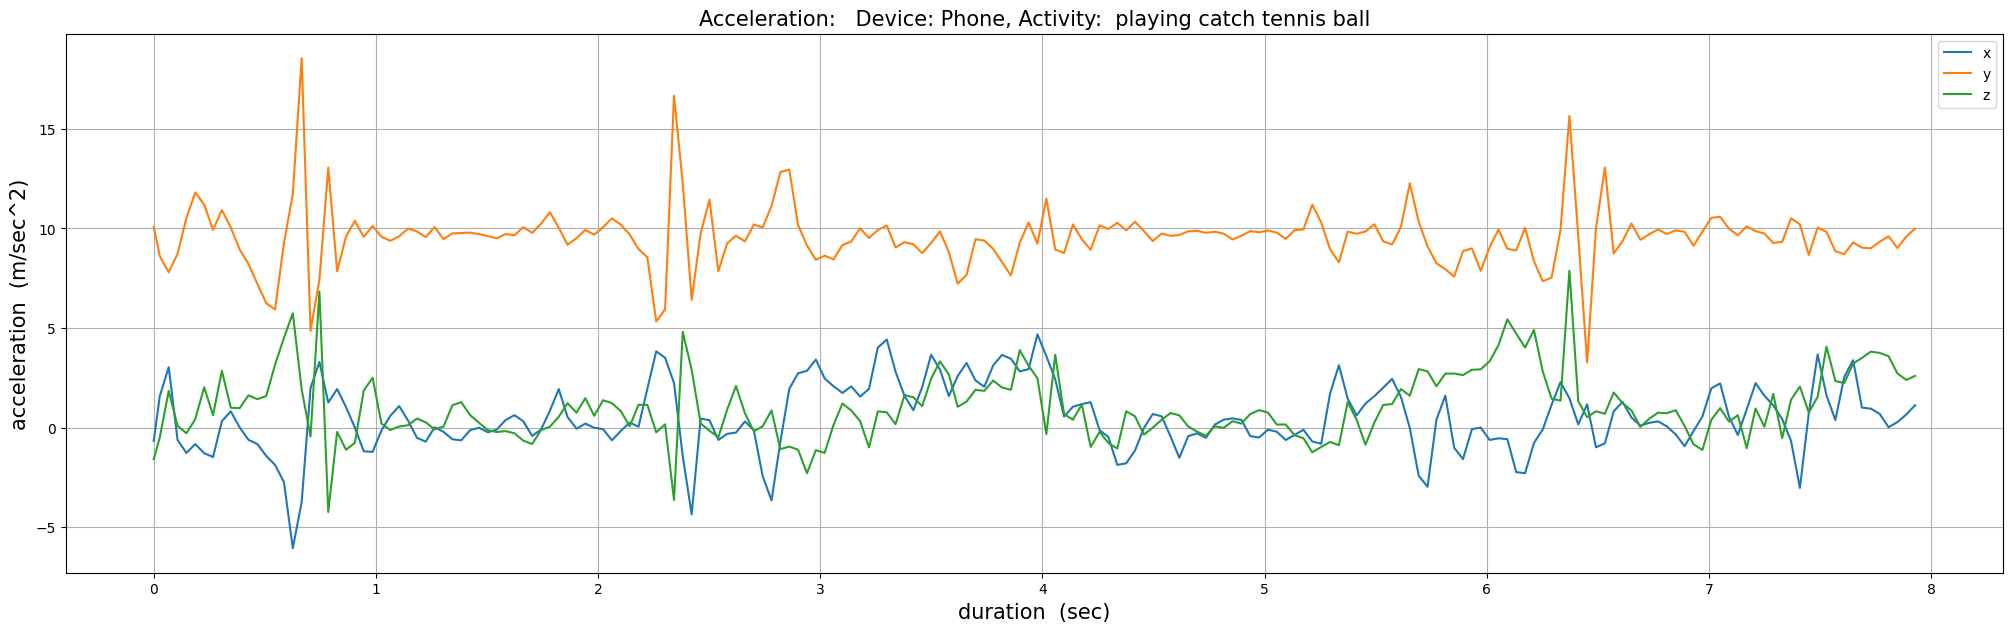

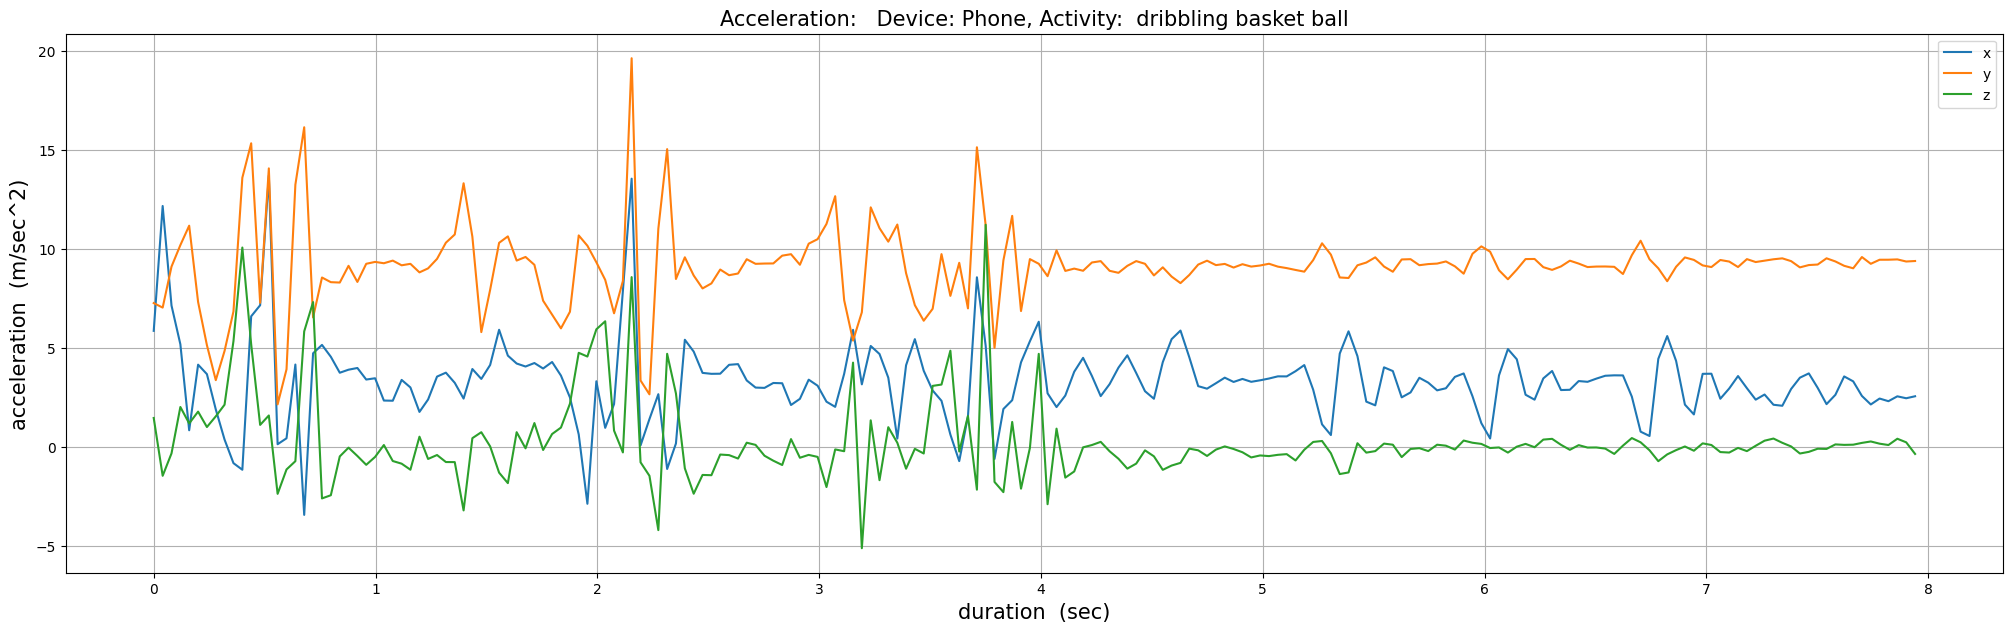

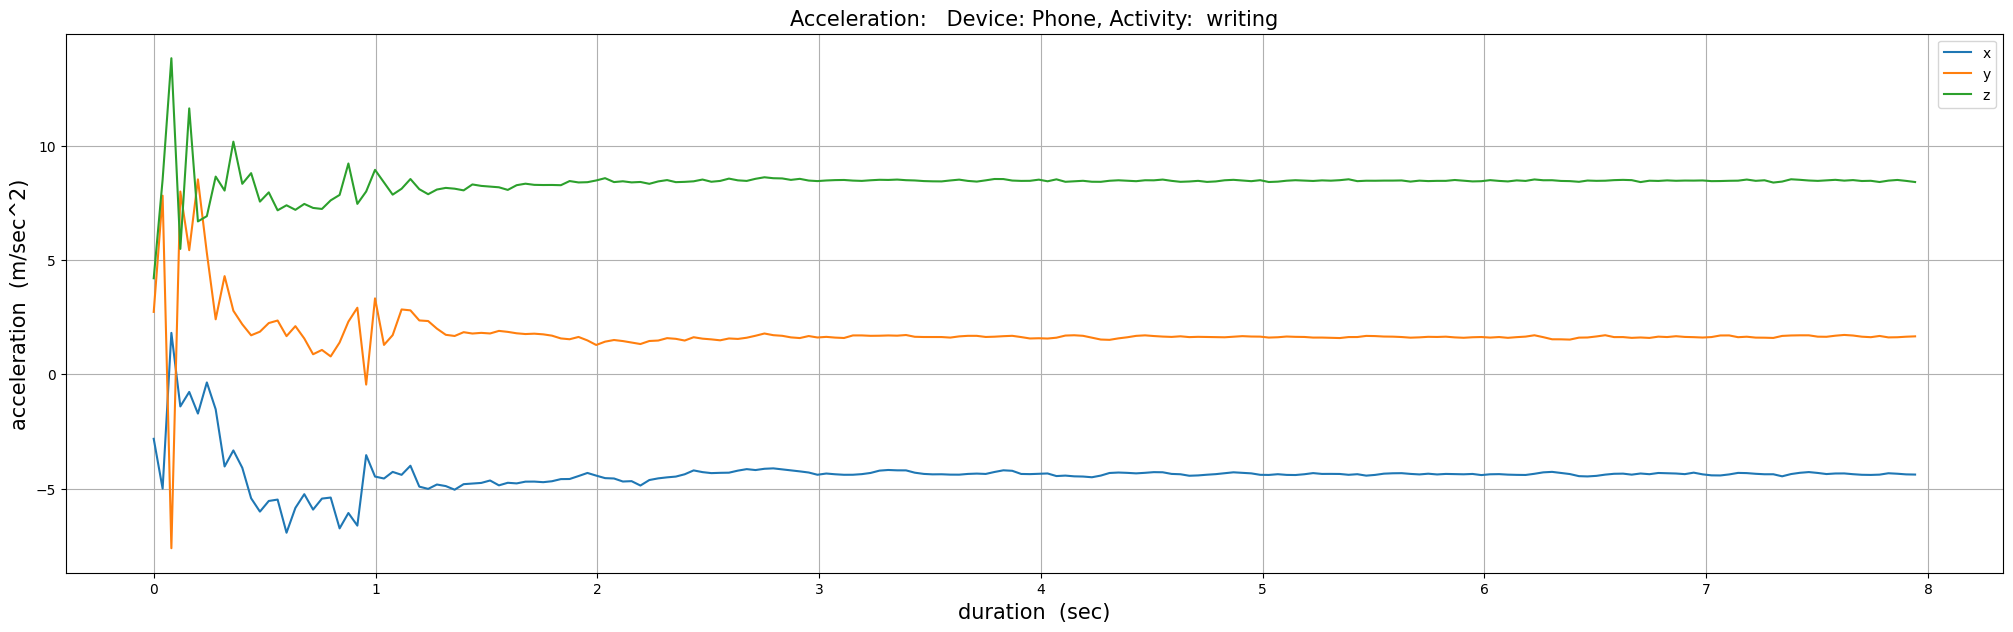

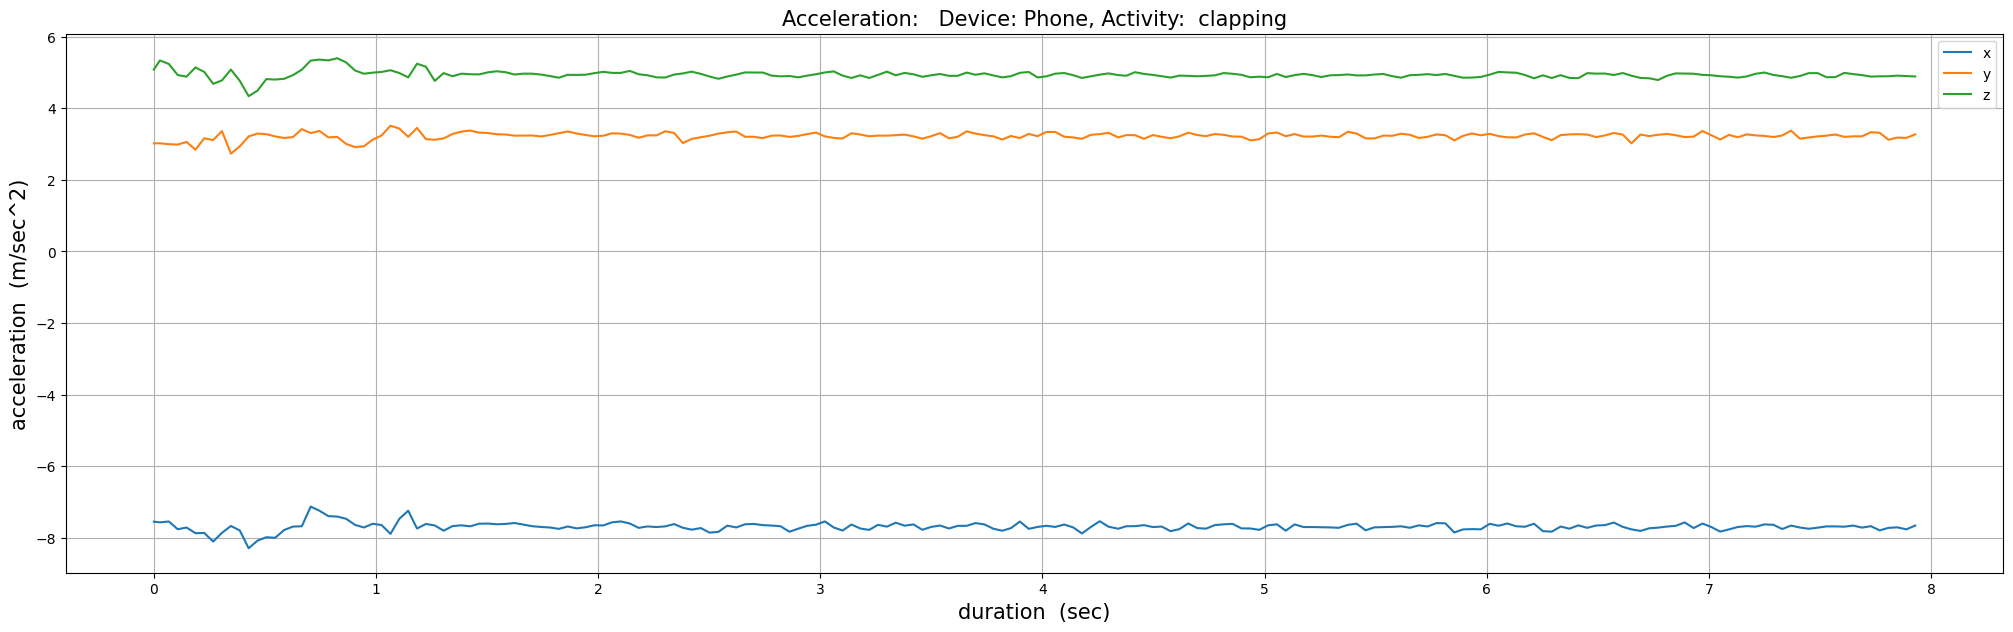

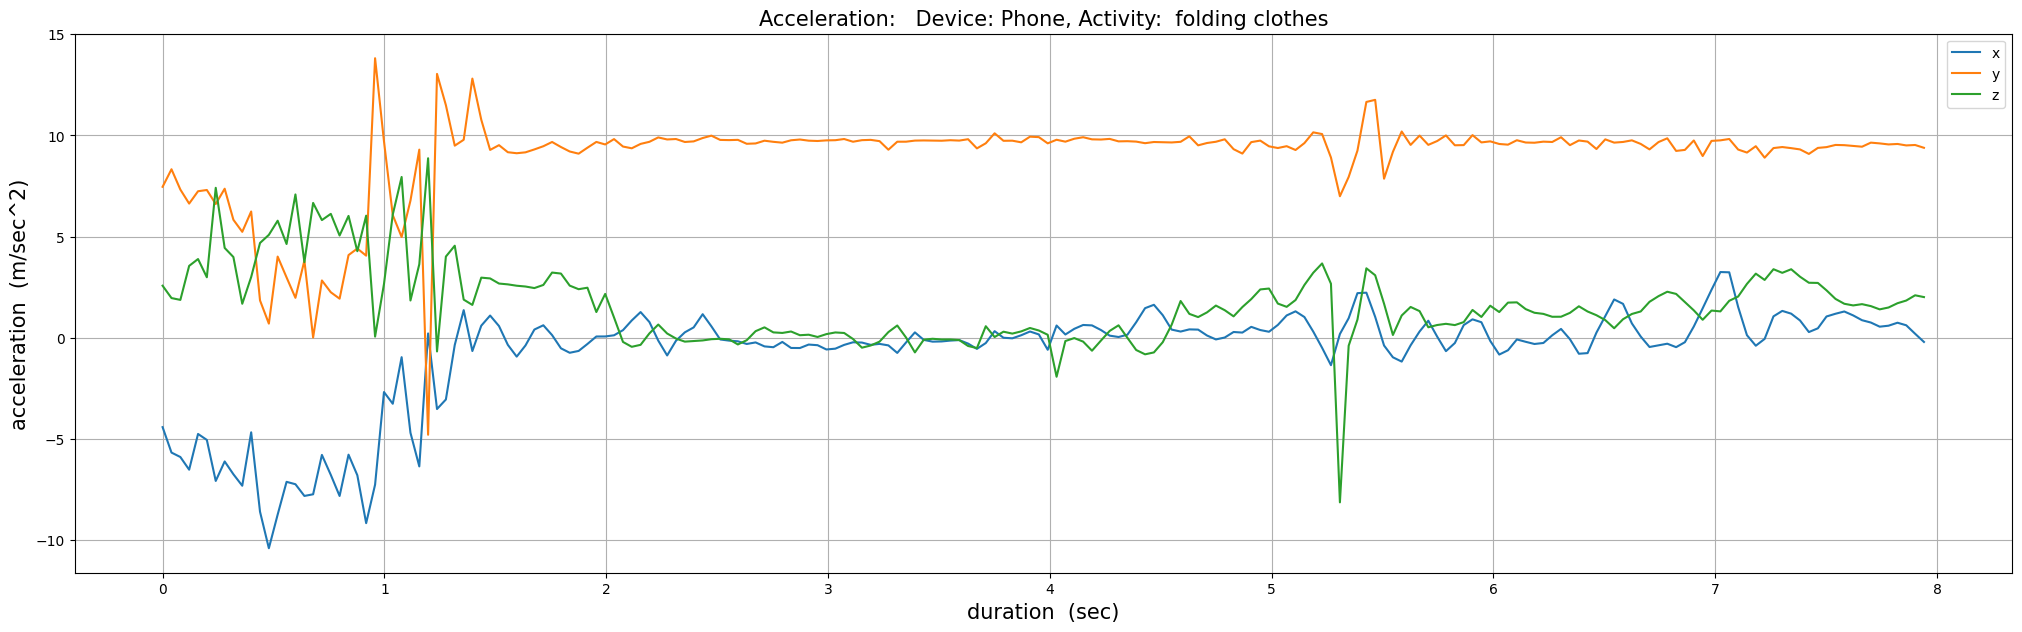

In [31]:
def show_accelerometer_graph( df, activity, interval_in_sec):
    df1 = df.loc[df.activity == activity].copy()
    df1.reset_index(drop = True, inplace = True)
    # nanoseconds --> seconds
    df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 
    
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True)
    ax.set_xlabel('duration  (sec)', fontsize = 15)
    ax.set_ylabel('acceleration  (m/sec^2)',fontsize = 15)
    ax.set_title('Acceleration:   Device: Phone, Activity:  ' + activity, fontsize = 15)

for key in activity_codes_mapping:
    show_accelerometer_graph(df_pa_p01, activity_codes_mapping[key], 10)


## Phone Gyroscope

In [32]:
df_pg_p01 = pd.read_csv(r'../dataset/raw/phone/gyro/data_1601_gyro_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
df_pg_p01.z = df_pg_p01.z.str.strip(';')
df_pg_p01.z = pd.to_numeric(df_pg_p01.z)
df_pg_p01['activity'] = df_pg_p01['activity_code'].map(activity_codes_mapping)
df_pg_p01 = df_pg_p01[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

df_pg_p01

participant_id activity_code         activity        timestamp  \
0                1601             A          walking  265073308304101   
1                1601             A          walking  265073348330612   
2                1601             A          walking  265073388368581   
3                1601             A          walking  265073428111445   
4                1601             A          walking  265073468081082   
...               ...           ...              ...              ...   
81188            1601             S  folding clothes  258908699056416   
81189            1601             S  folding clothes  258908738947822   
81190            1601             S  folding clothes  258908778855321   
81191            1601             S  folding clothes  258908818435165   
81192            1601             S  folding clothes  258908858366259   

              x         y         z  
0     -0.020240 -0.004261 -0.023436  
1     -1.213602  0.055394 -0.369647  
2     -2.417352  1.124387 -1.644502  
3     -3.075152  1.530252 -1.672998  
4      0.011185  4.576909 -0.243679  
...         ...       ...       ...  
81188  0.034621 -0.045806 -0.041812  
81189  0.146474  0.045274 -0.059655  
81190  0.019175  0.034887 -0.078563  
81191  0.226901 -0.001065 -0.113451  
81192  0.304133  0.148338 -0.103597  

[81193 rows x 7 columns]

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

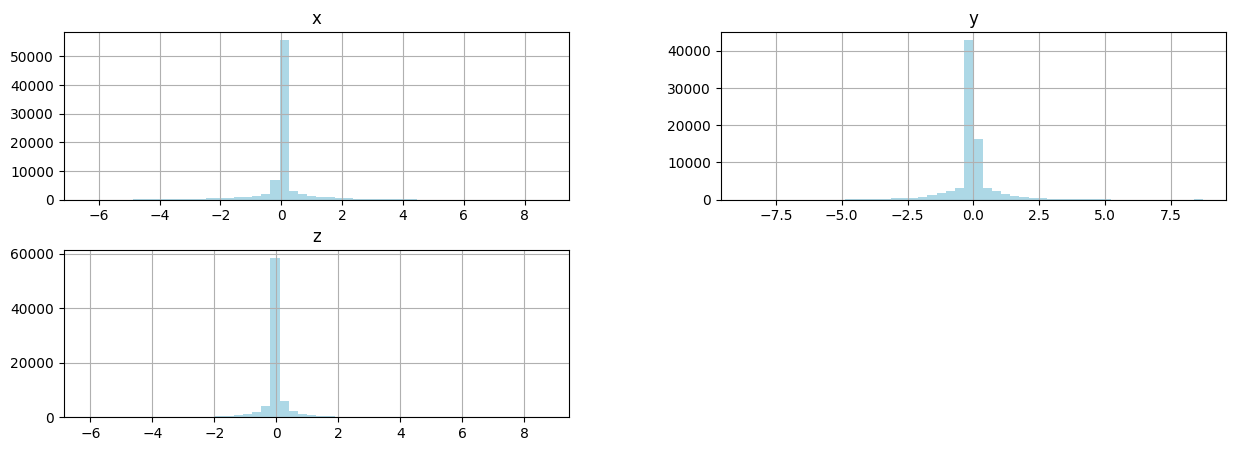

In [33]:
df_pg_p01[['x', 'y', 'z']].hist(bins = 50, figsize = (15, 5), color='lightblue')

    - Observation
        - data shows symmetry and centered around zero

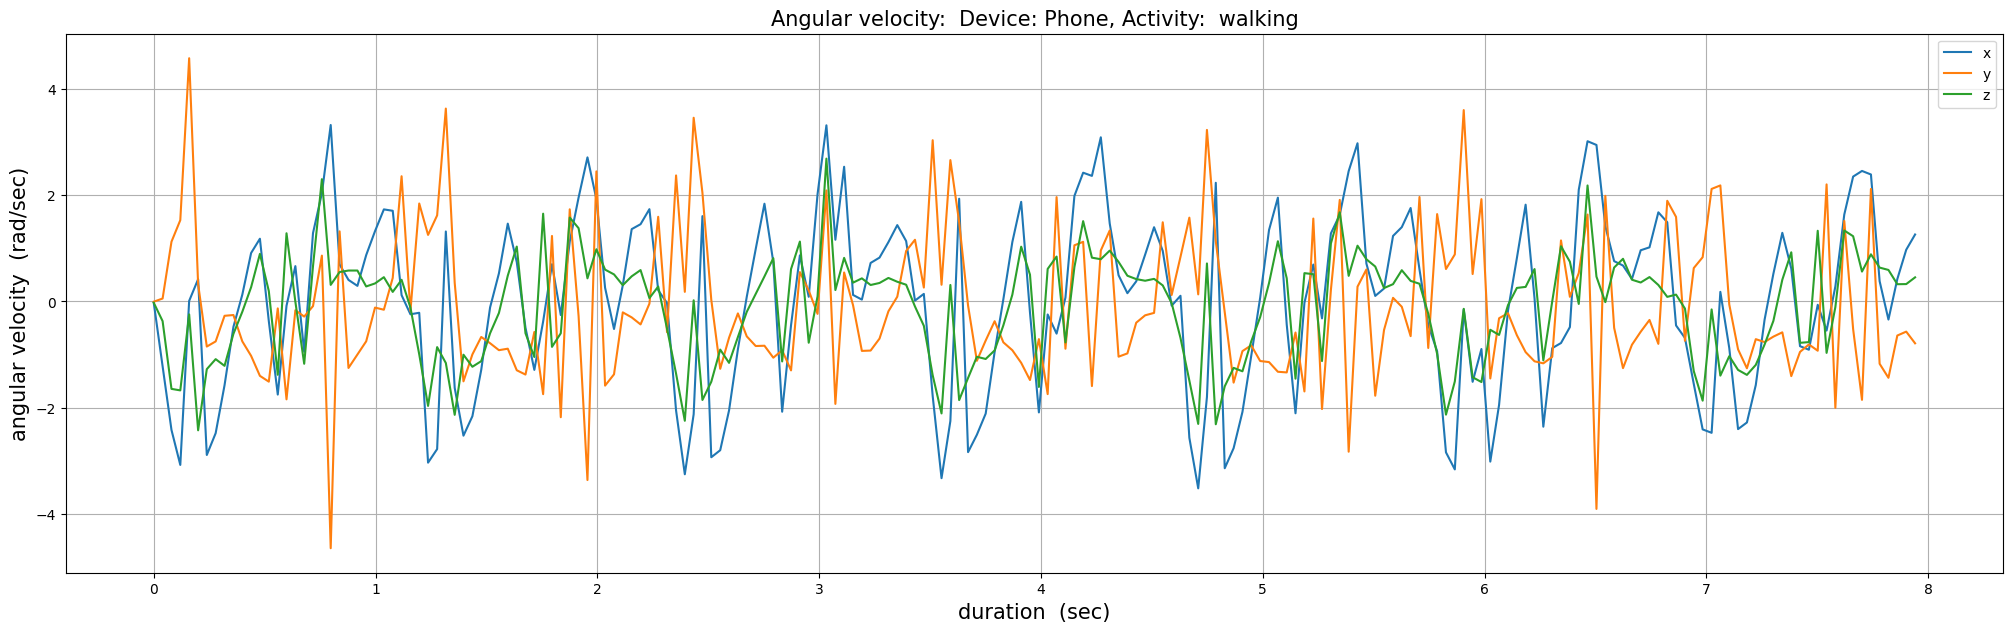

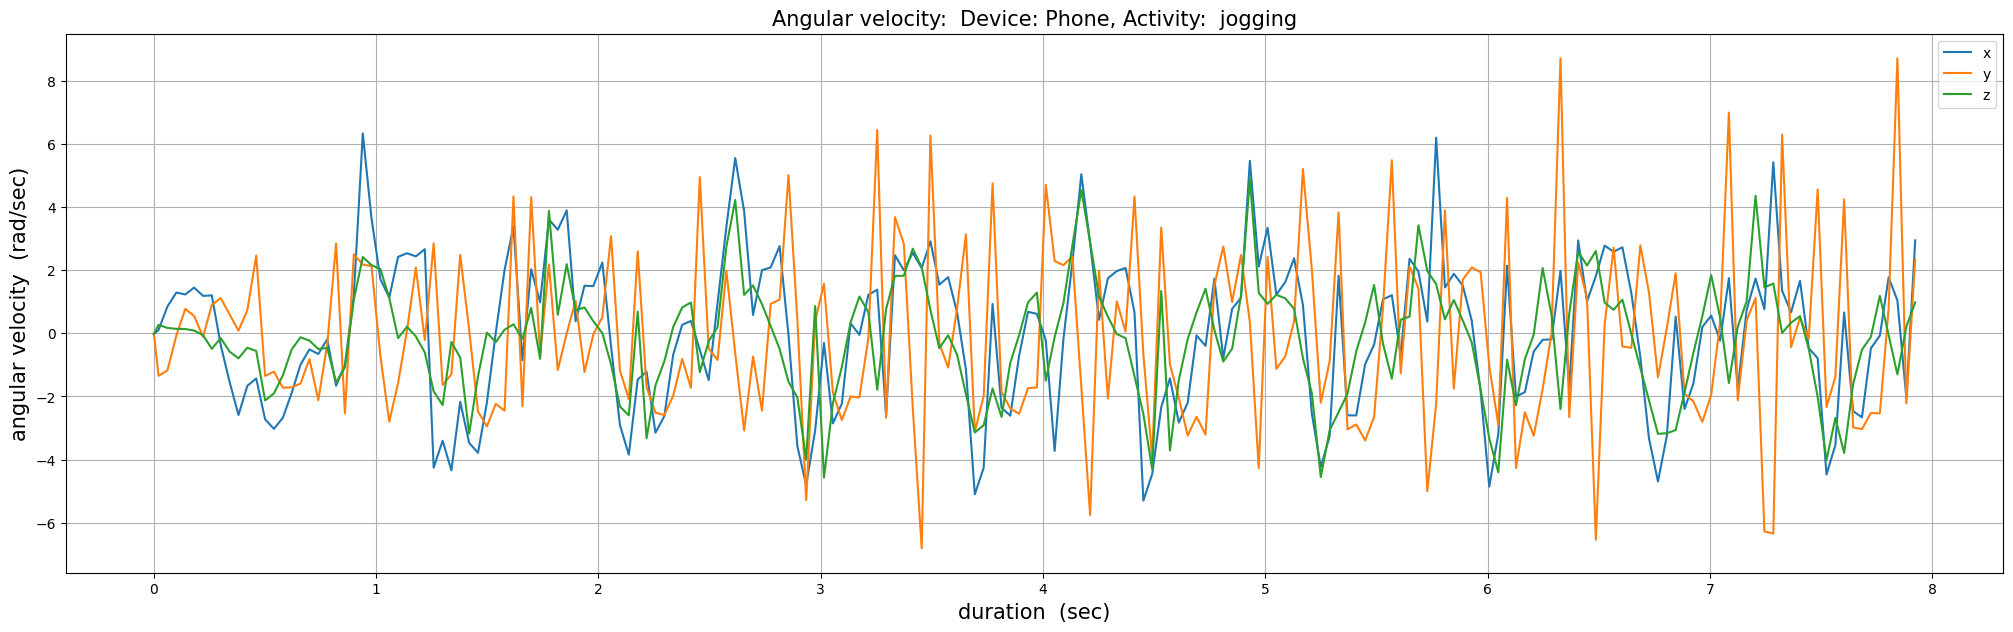

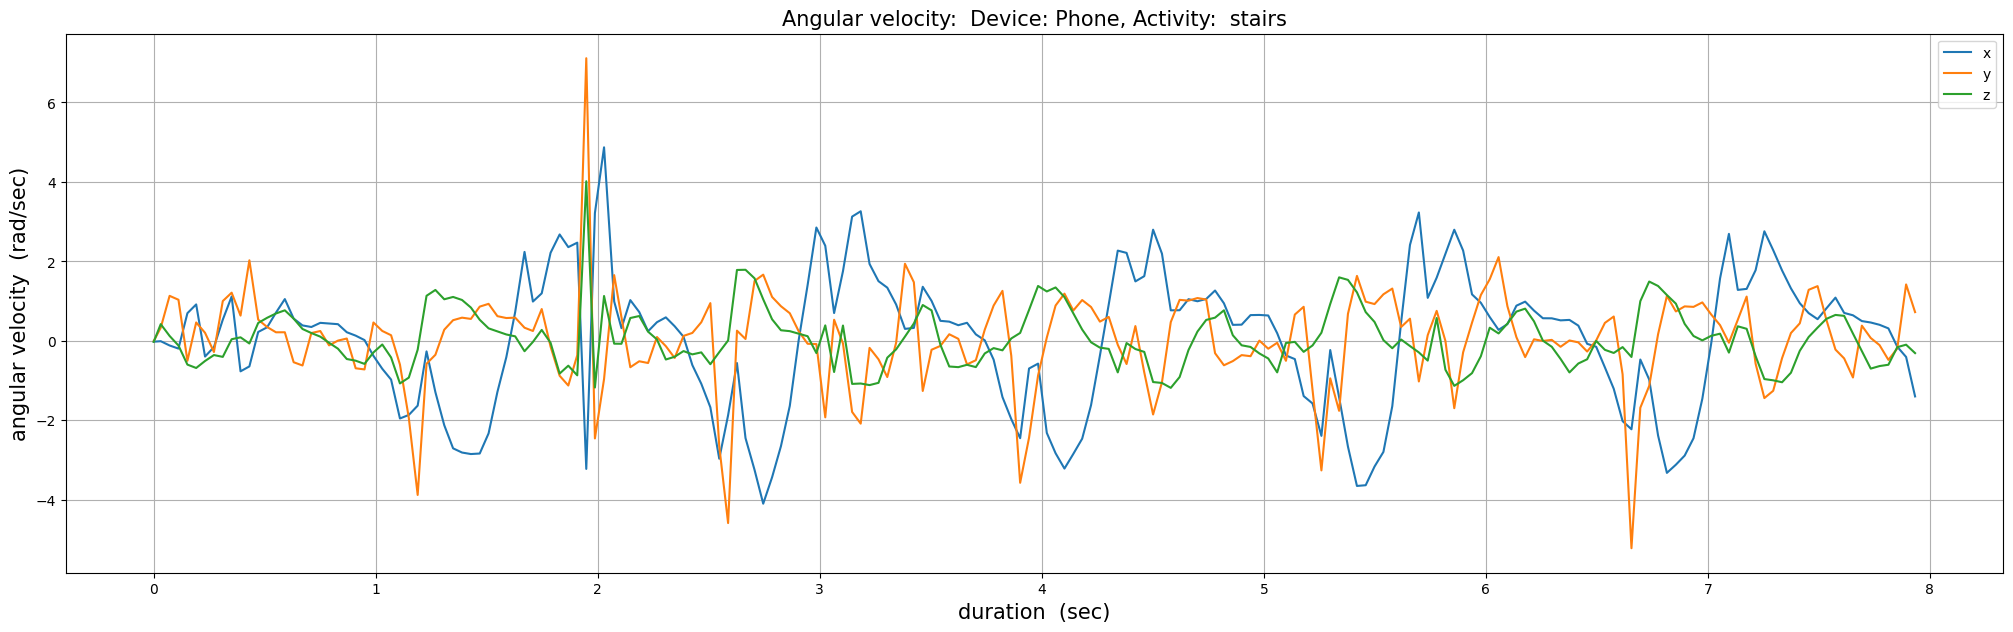

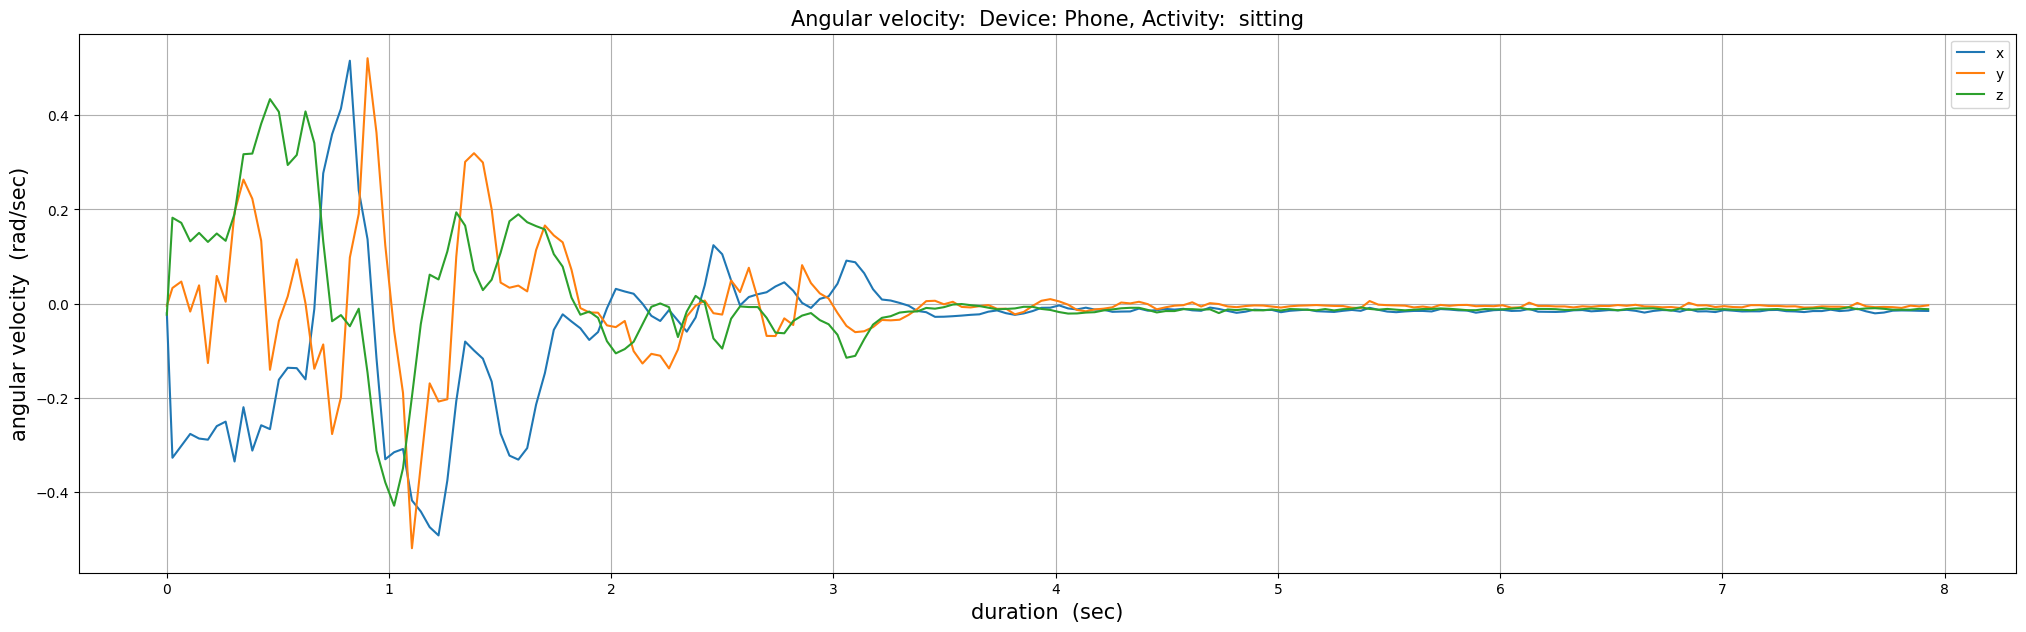

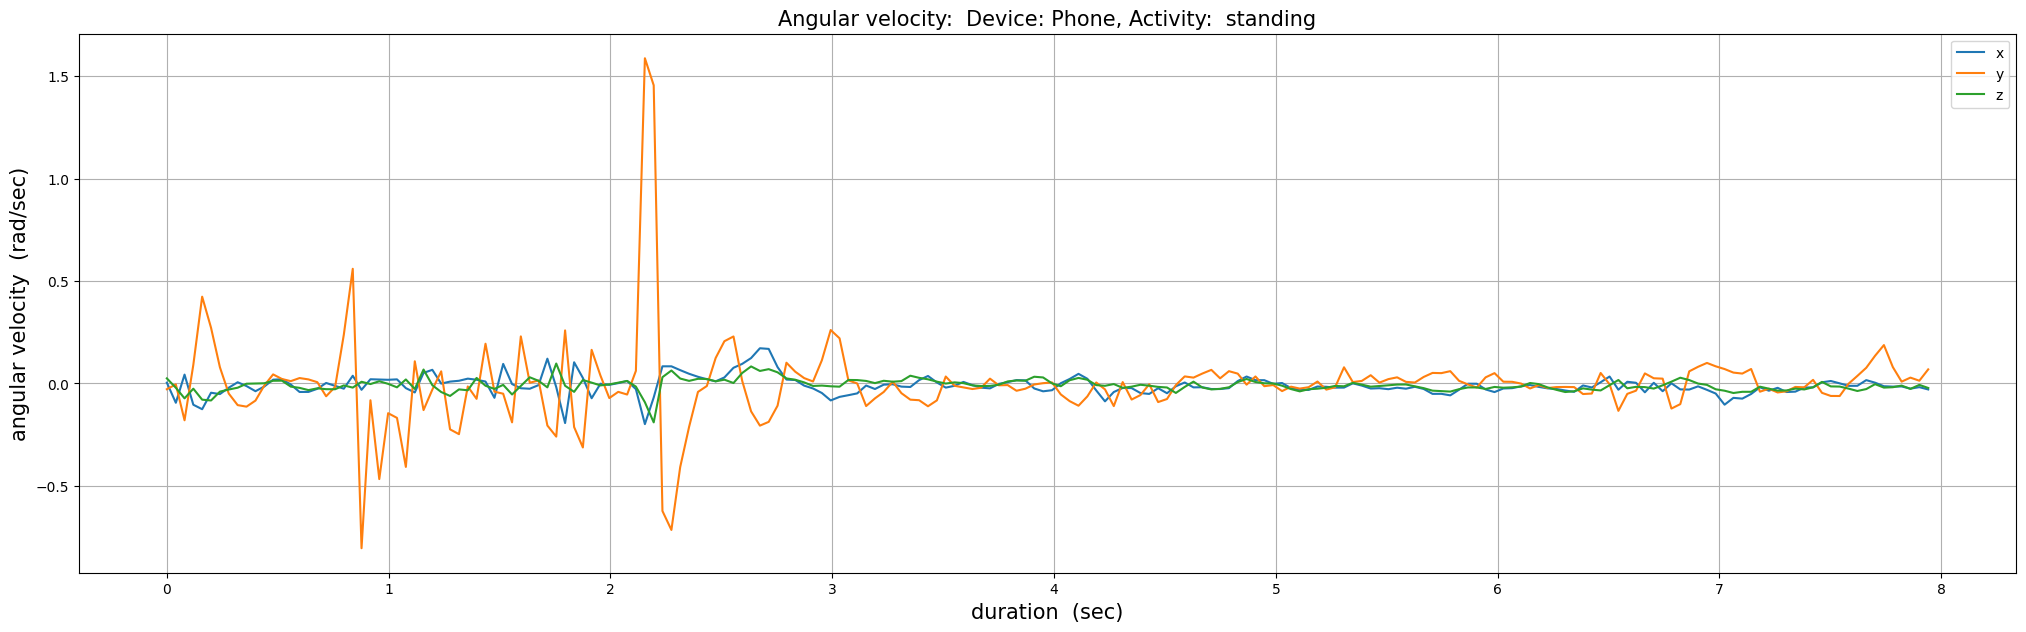

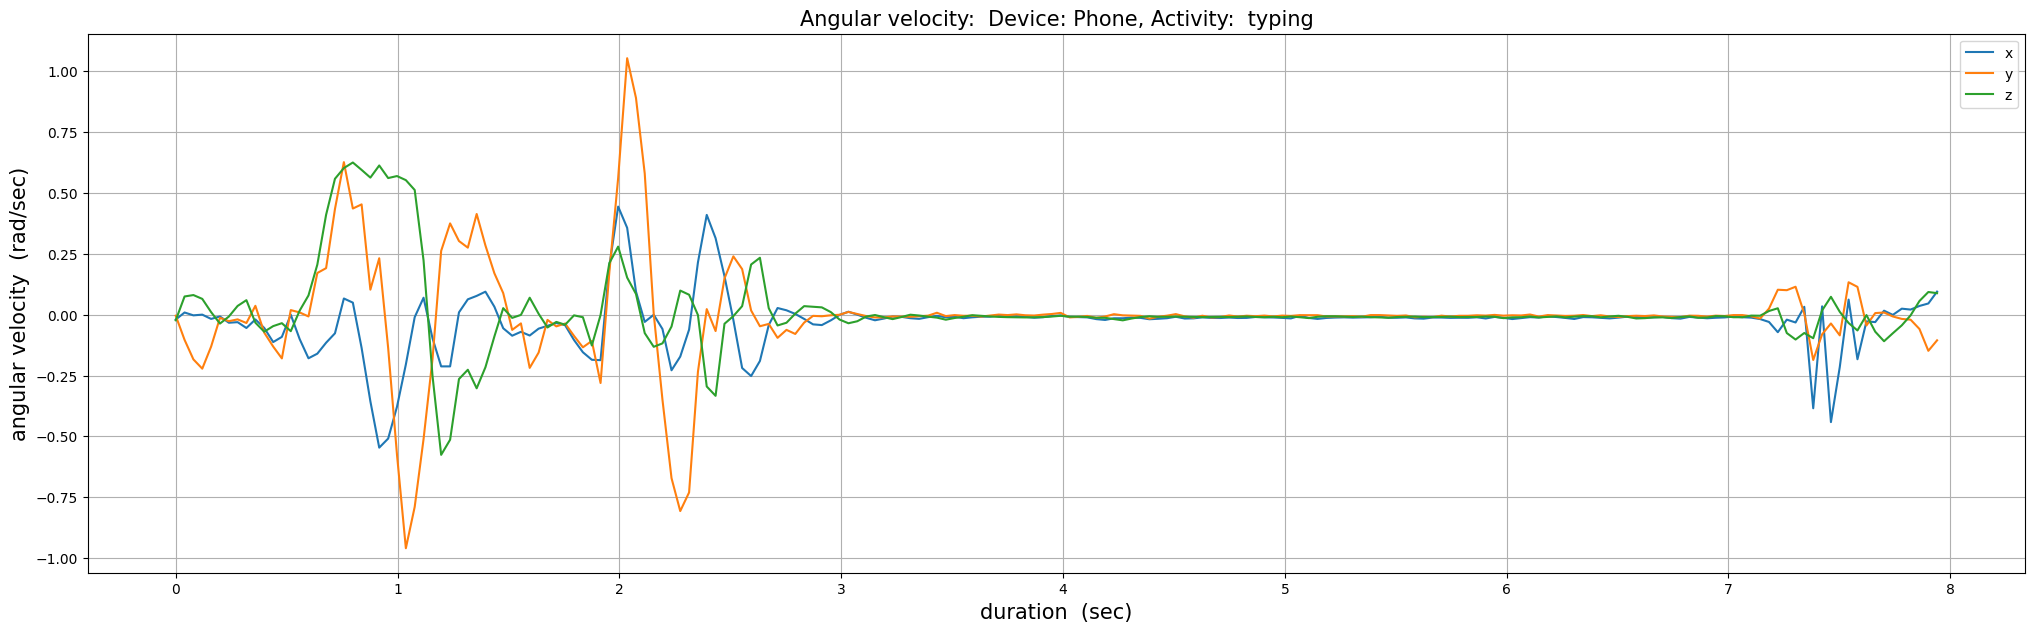

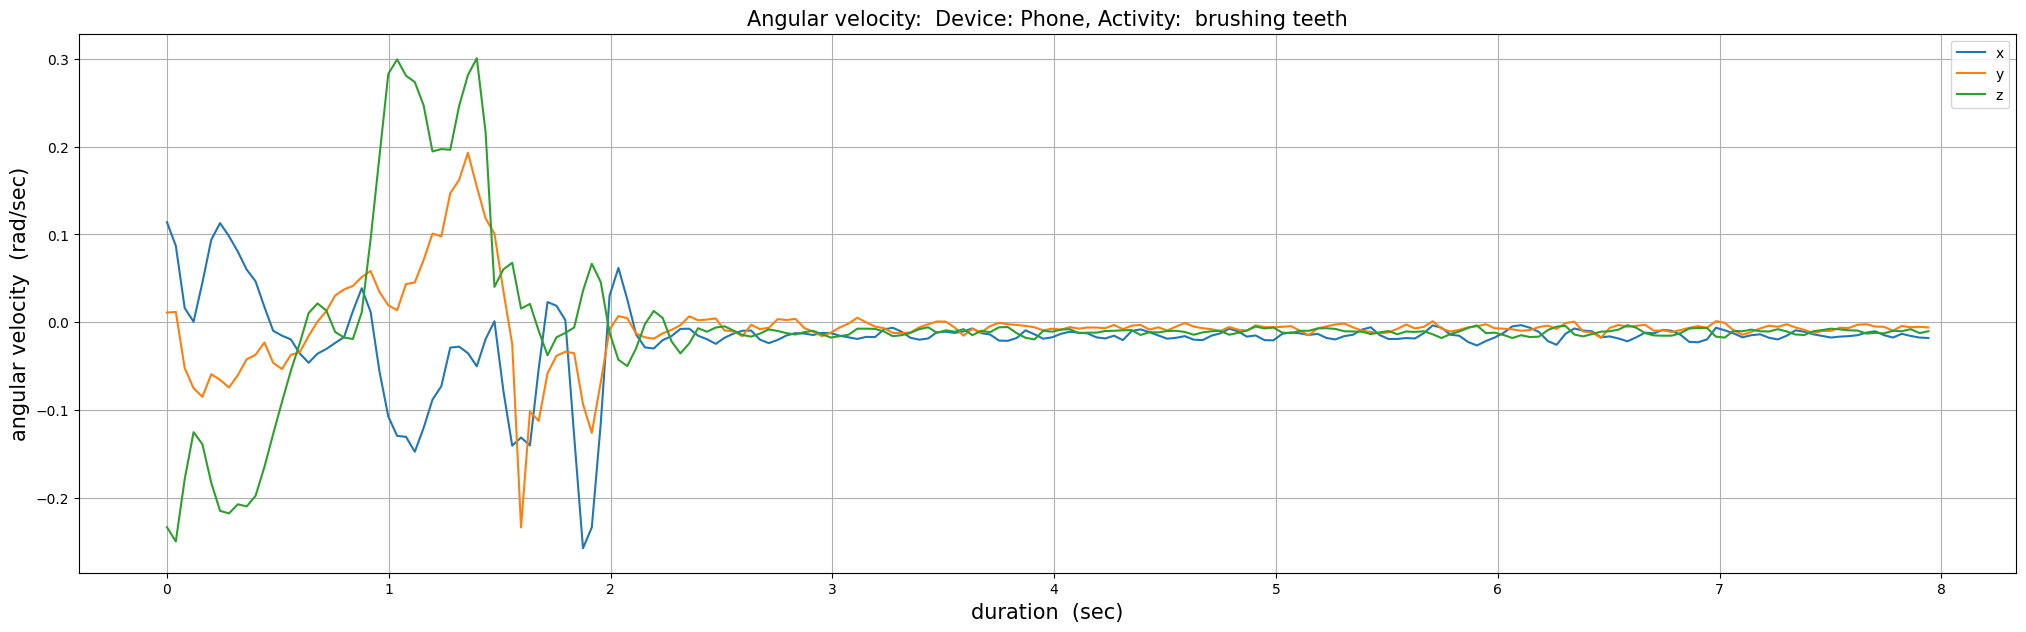

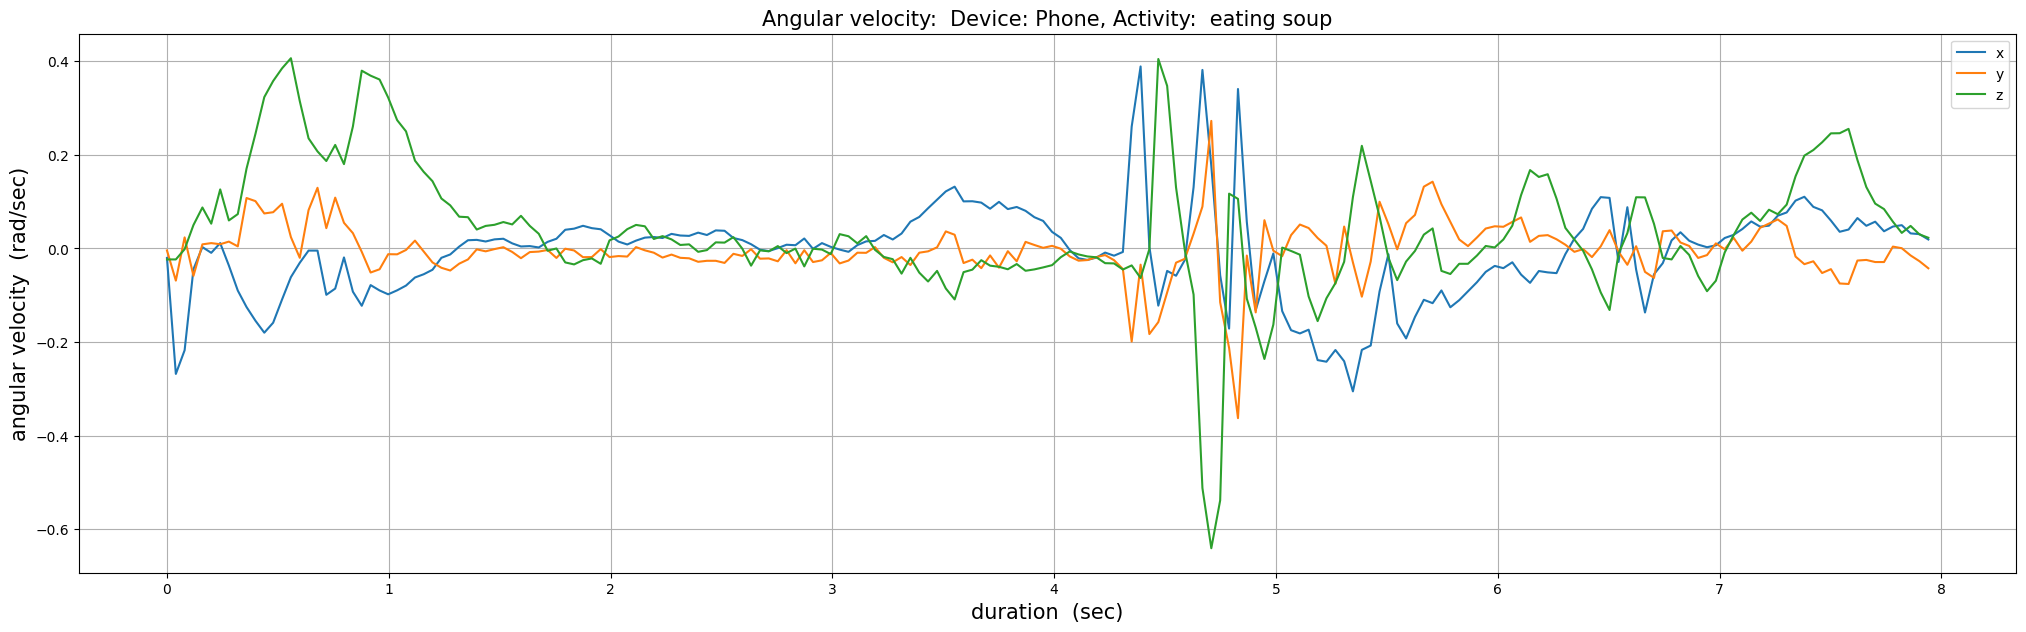

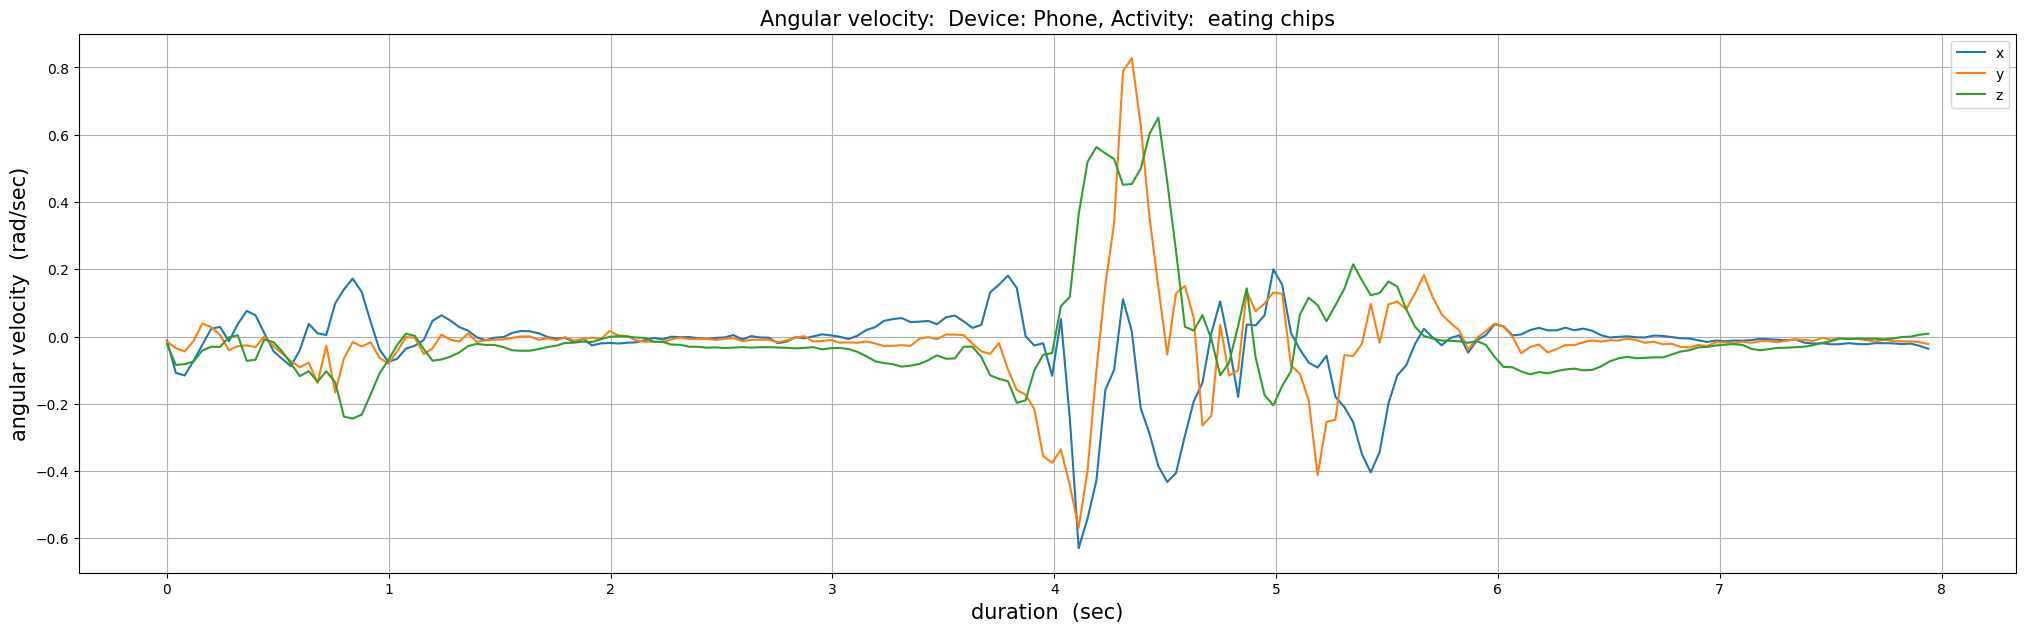

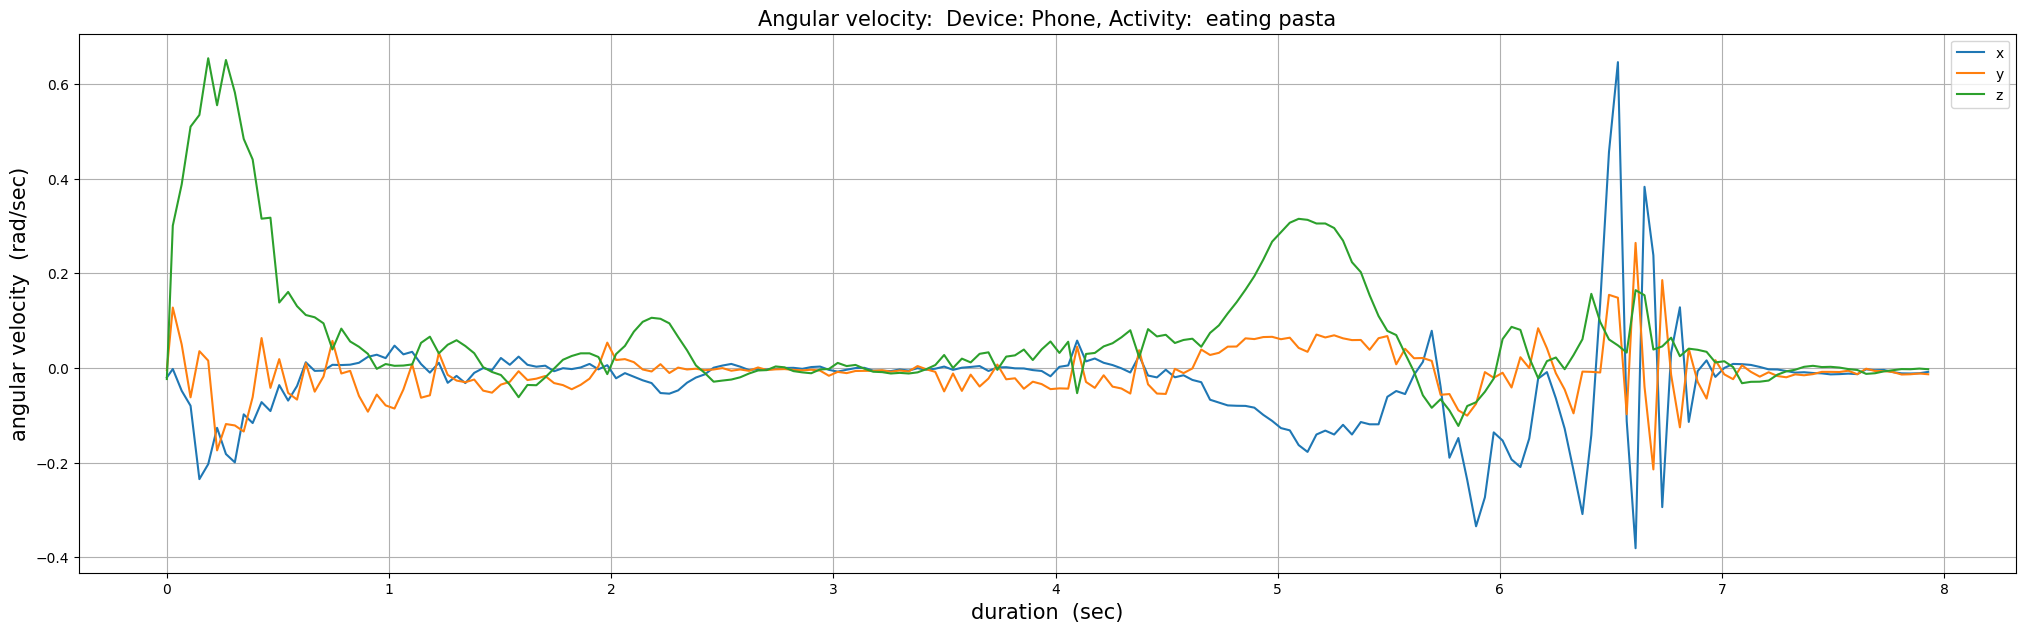

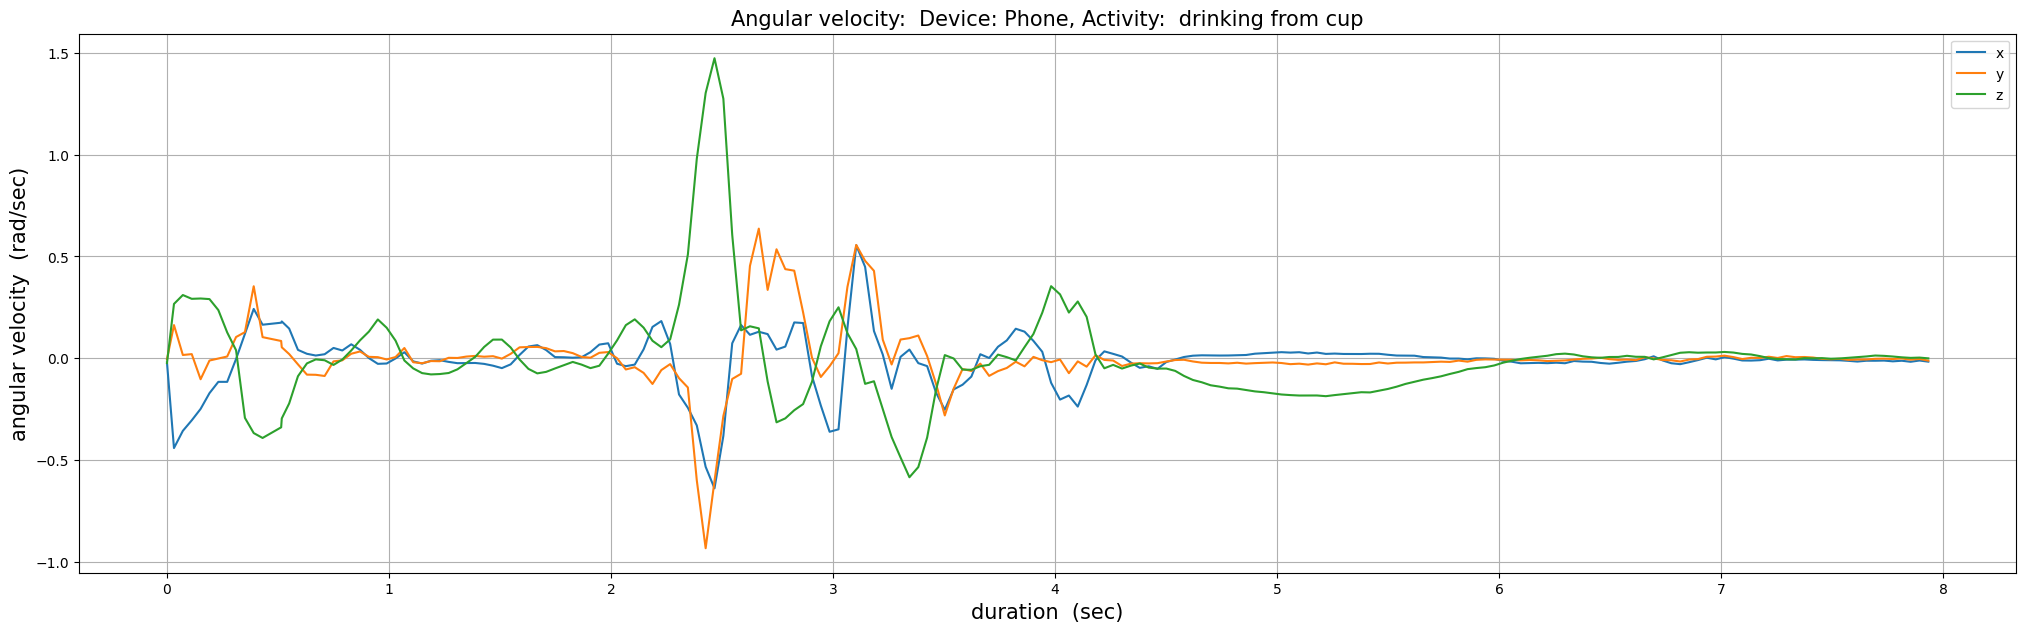

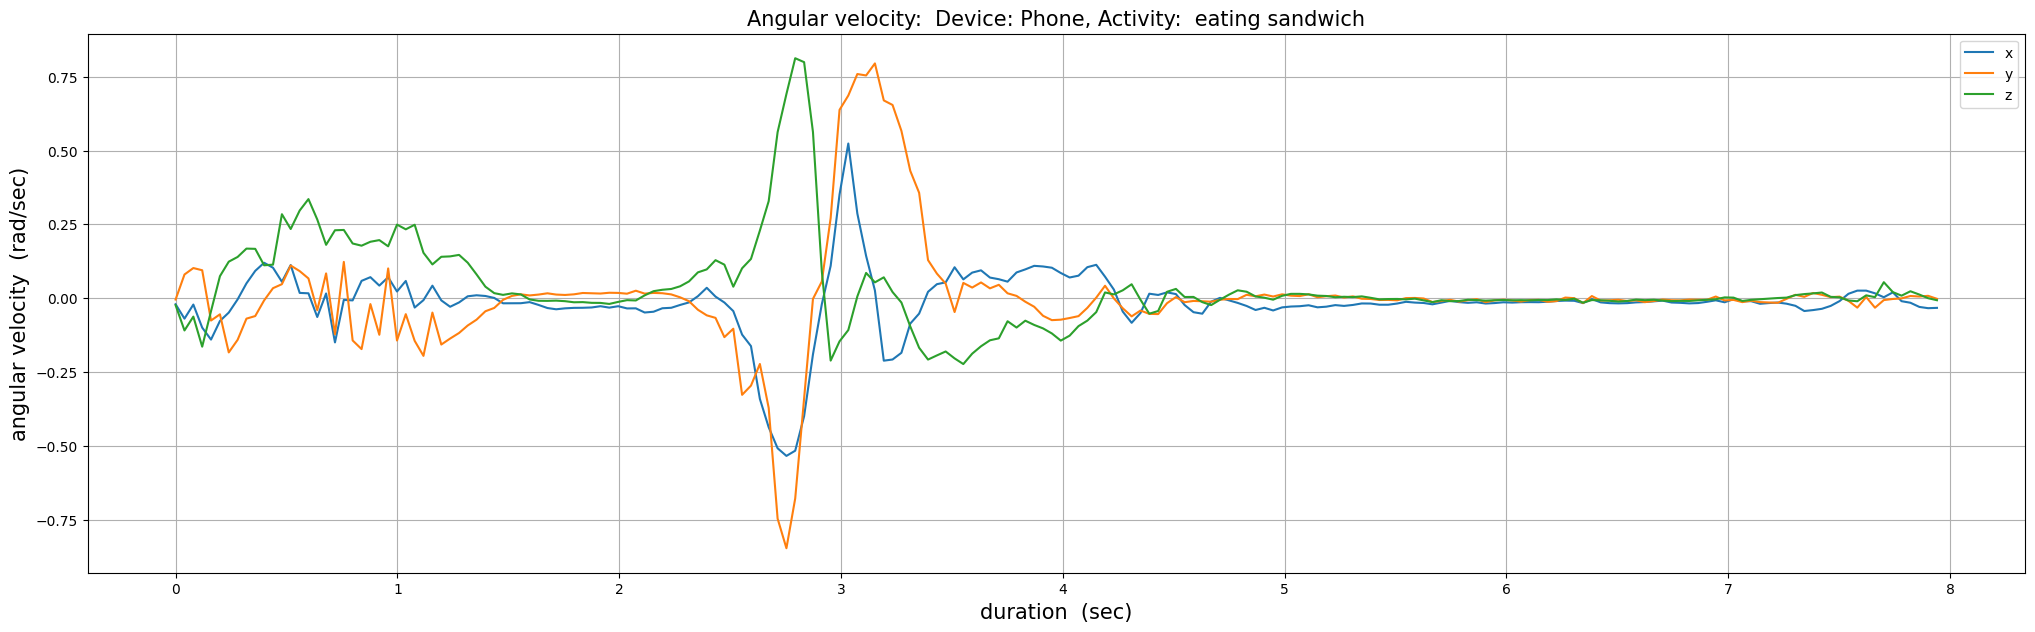

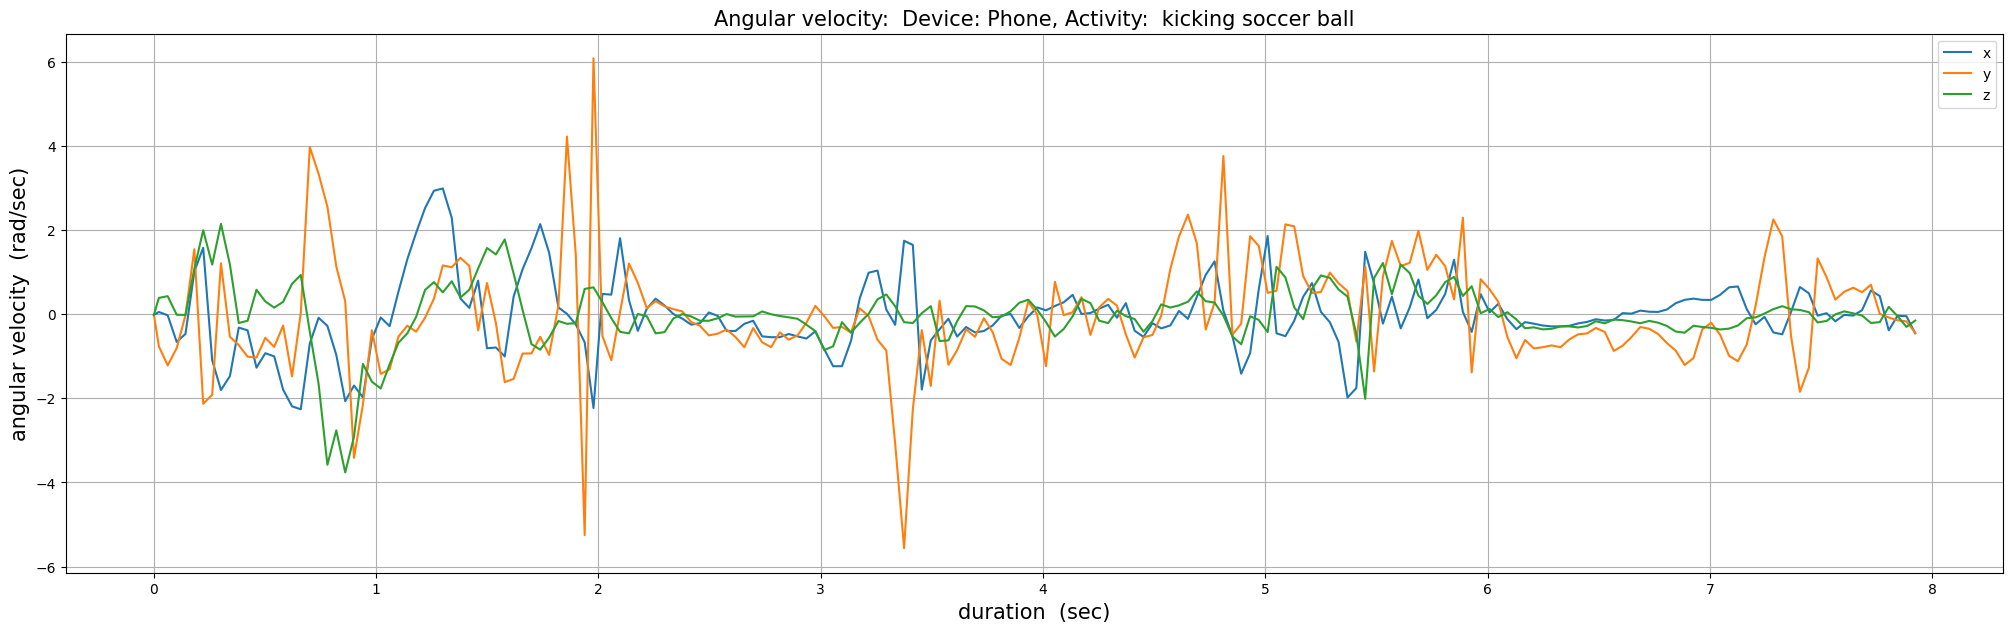

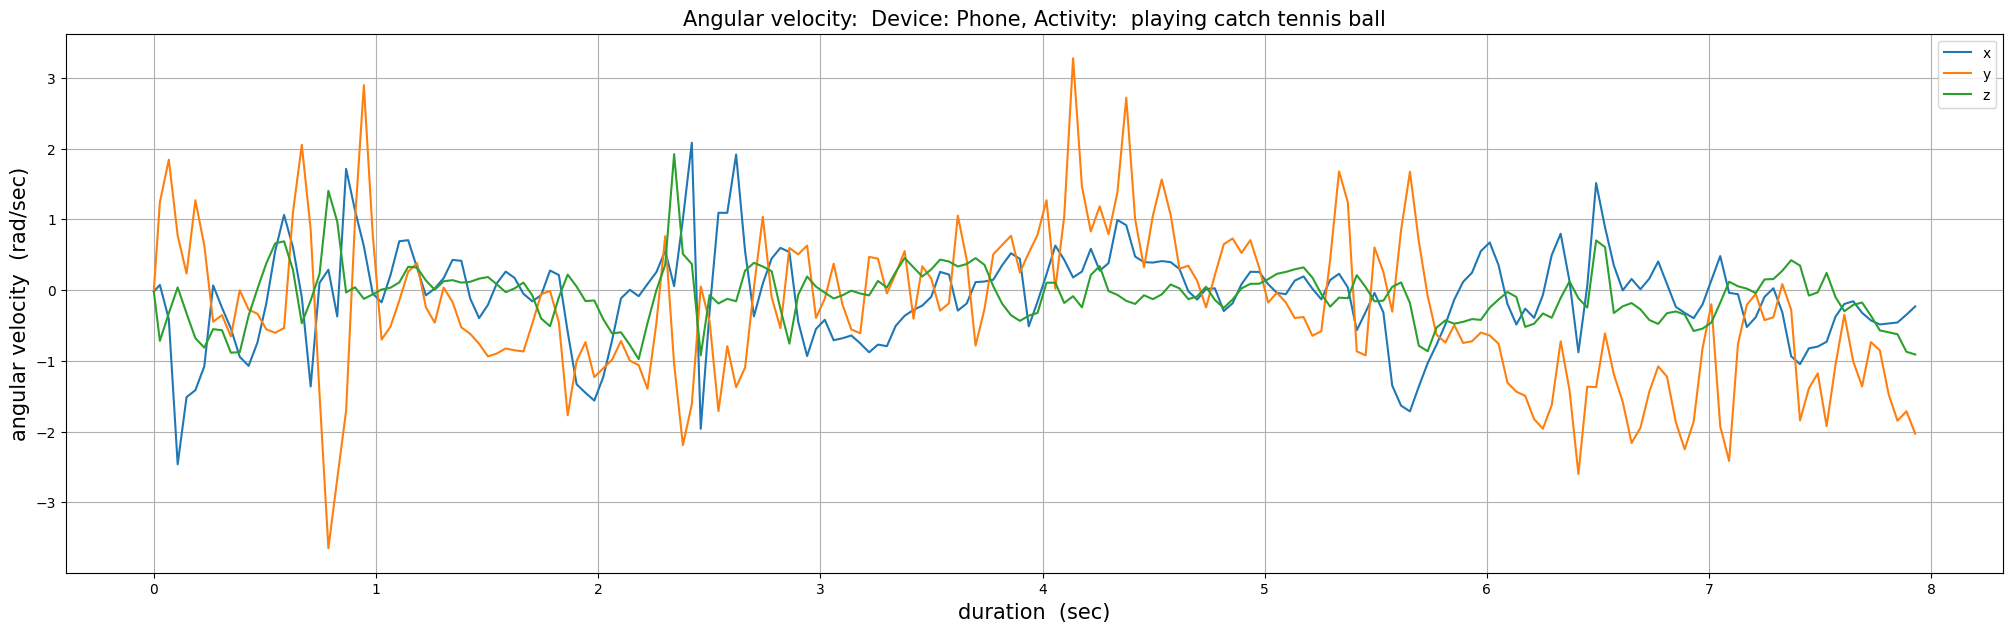

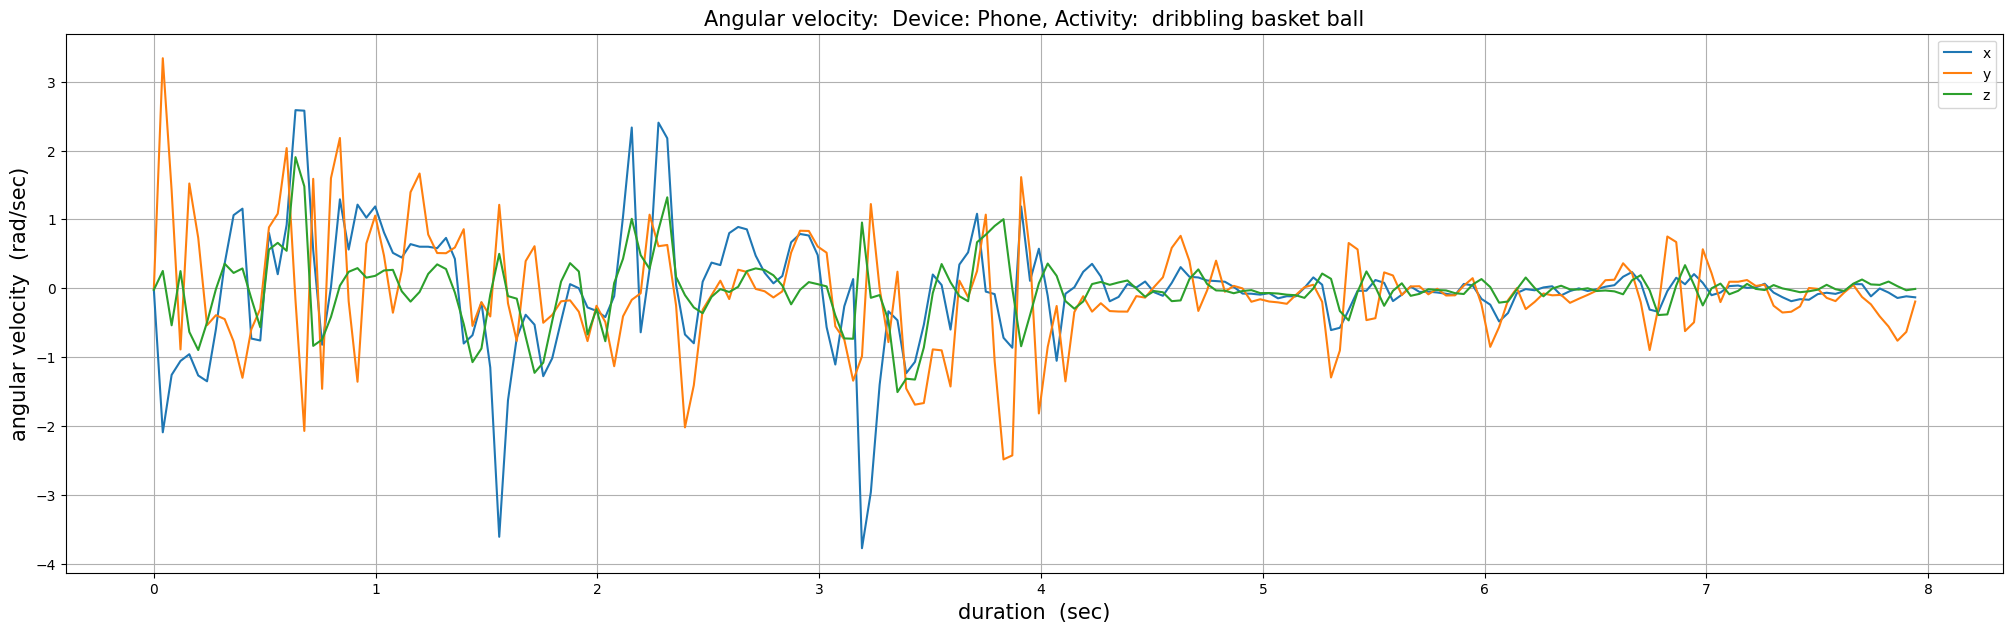

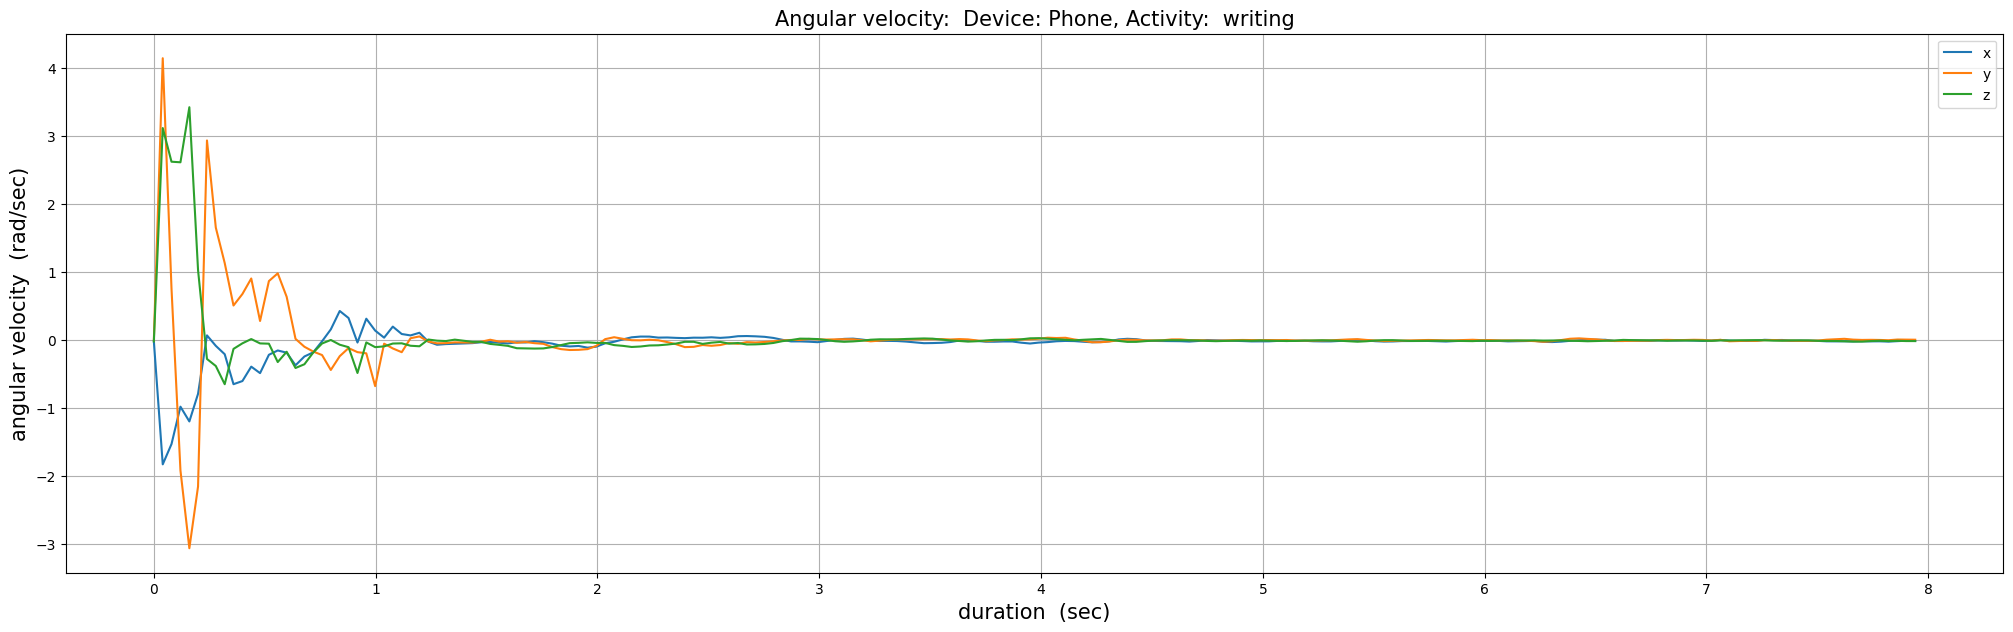

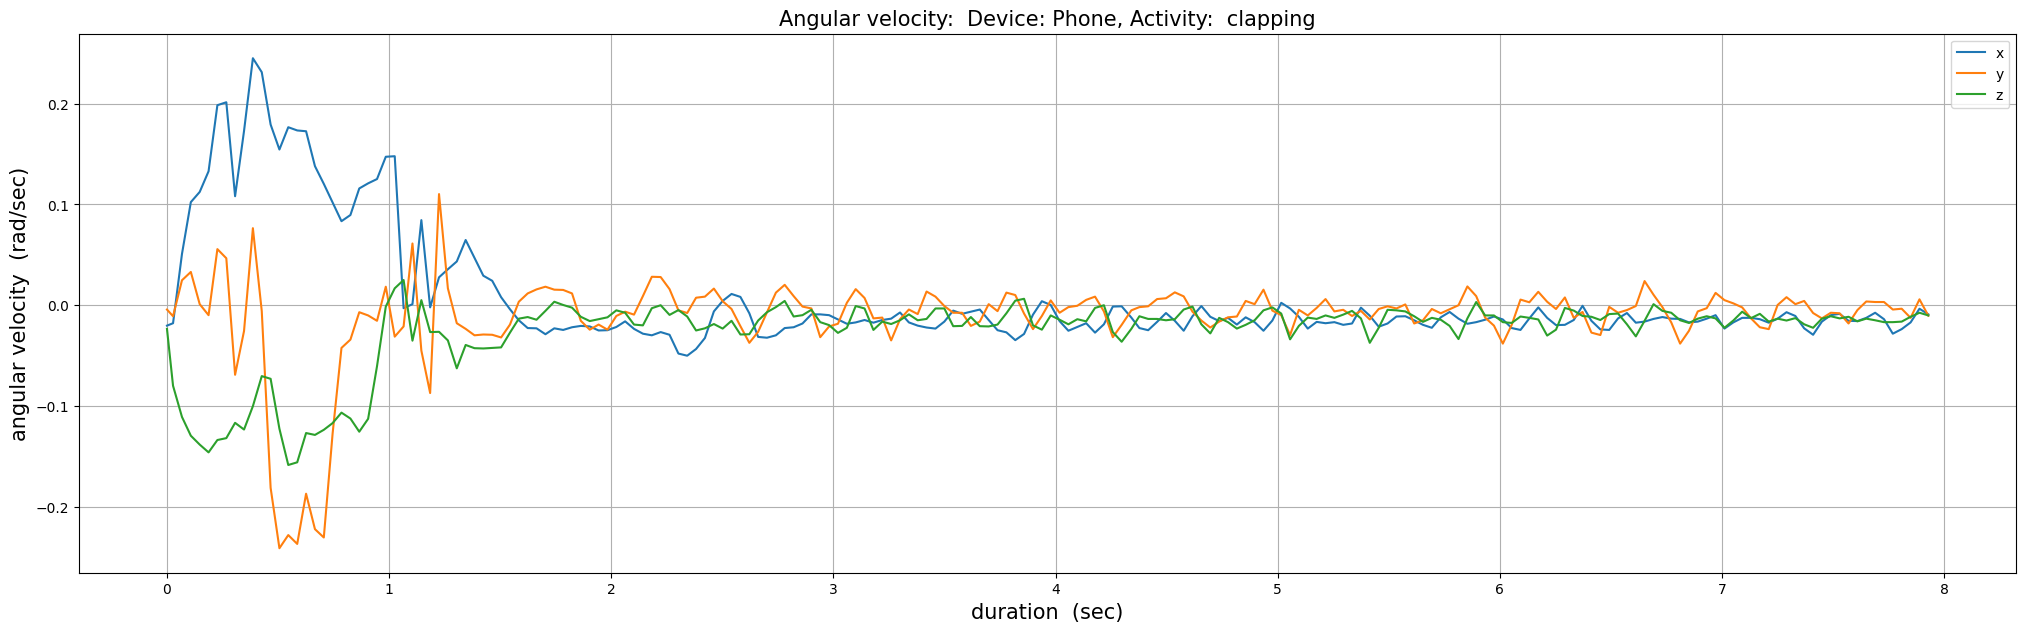

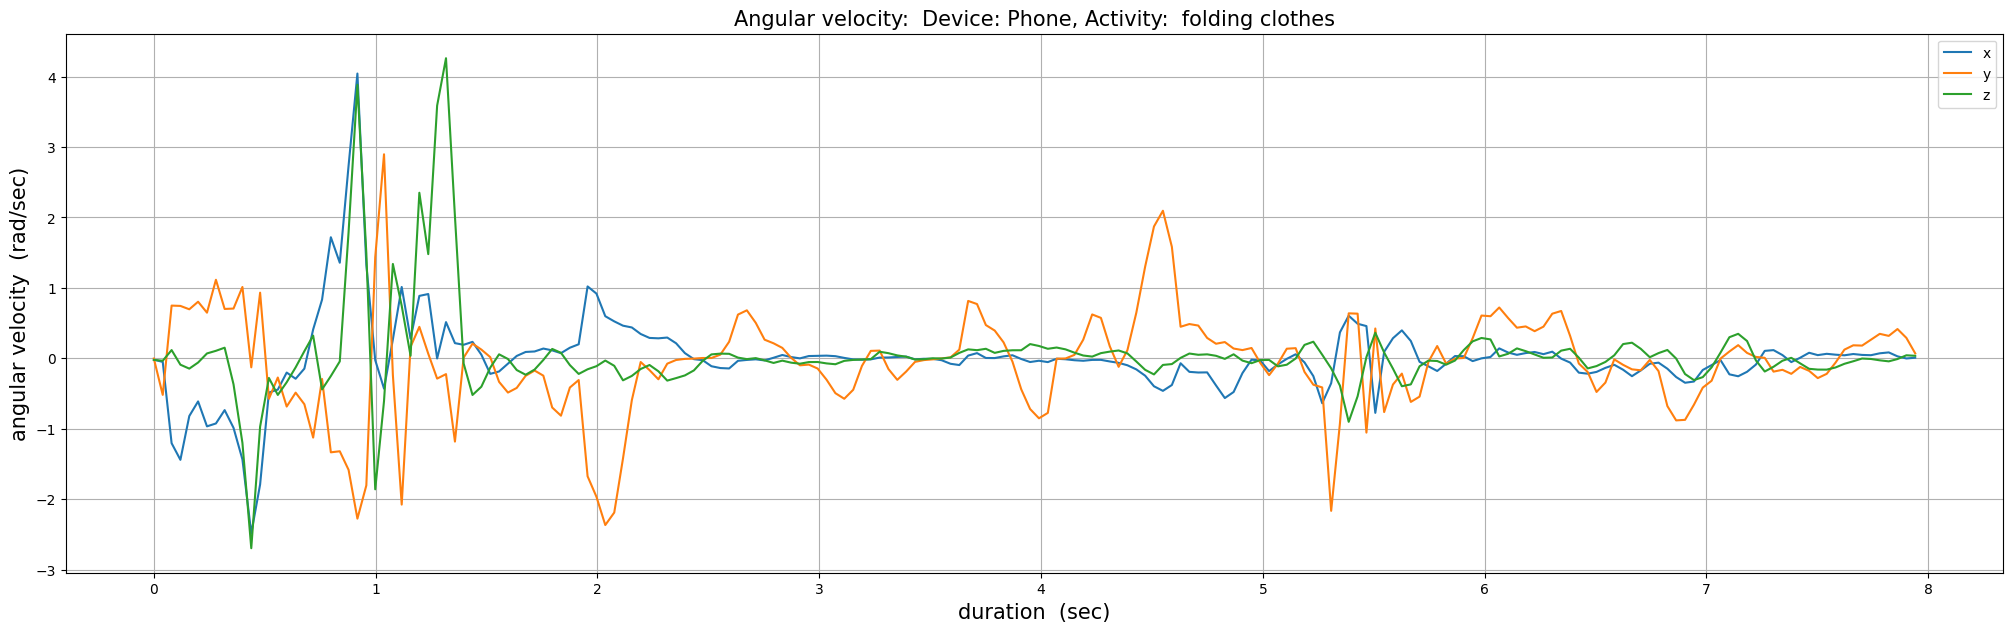

In [34]:
def show_ang_velocity_per_activity(df, act, interval_in_sec):
    df1 = df.loc[df.activity == act].copy()
    df1.reset_index(drop = True, inplace = True)
    # nanoseconds --> seconds
    df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000
    

    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)

    ax.set_xlabel('duration  (sec)', fontsize = 15)
    ax.set_ylabel('angular velocity  (rad/sec)',fontsize = 15)
    ax.set_title('Angular velocity:  Device: Phone, Activity:  ' + act, fontsize = 15)

for key in activity_codes_mapping:
  show_ang_velocity_per_activity(df_pg_p01, activity_codes_mapping[key], 10)